## Finpro Stage 1 - EDA - installment payments

# 1. Group 3 <br>
**Byte Me** <br>
Hijir Della Wirasti <br>
Mauliddinia Iftikhar Agnany <br>
Jericho Medion Haryono <br>
Fakhri Dwi Nugroho <br>
Ryan Nofandi <br>
Johannes Sibarani <br>
Achmad Fichri Rachmadhani <br>
Muhammad Naufal <br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2


In [3]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [5]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# 1. Load Data

In [7]:
data = pd.read_csv('bureau.csv')
data.sample(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
894601,320310,5461397,Closed,currency 1,-1145,0,-777.0,-776.0,NaN,0,108292.5,0.000,NaN,0.0,Consumer credit,-764,NaN
188748,140651,5786891,Closed,currency 1,-1659,0,-1510.0,-1031.0,NaN,0,51039.0,NaN,NaN,0.0,Consumer credit,-1028,NaN
241438,131998,5793372,Closed,currency 1,-42,0,-26.0,-31.0,NaN,0,22500.0,0.000,0.0,0.0,Consumer credit,-15,NaN
1070188,128874,6249164,Closed,currency 1,-1457,0,-1427.0,-1205.0,NaN,0,196141.5,NaN,NaN,0.0,Consumer credit,-1202,0.0
392992,443683,6320360,Closed,currency 1,-2562,0,-2379.0,-2373.0,NaN,0,17145.0,0.000,NaN,0.0,Consumer credit,-2373,NaN
46394,391849,5217561,Active,currency 1,-700,0,30.0,NaN,0.0,0,90000.0,9014.715,0.0,0.0,Consumer credit,-8,NaN
1012183,363264,5129015,Active,currency 1,-412,0,318.0,NaN,0.0,0,213637.5,111100.500,0.0,0.0,Consumer credit,-23,NaN
460127,211749,5042421,Closed,currency 1,-618,0,-400.0,-400.0,NaN,0,180000.0,0.000,NaN,0.0,Consumer credit,-400,NaN
1082787,107765,6218769,Active,currency 1,-355,0,1470.0,NaN,58.5,0,2903355.0,2519730.000,0.0,0.0,Car loan,-17,69070.5
90087,151698,5612161,Closed,currency 1,-2754,0,-928.0,-1142.0,NaN,0,315000.0,0.000,0.0,0.0,Consumer credit,-909,NaN


# 2. Descriptive Statistics

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


## A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya?
Sejauh ini keseluruhan tipe data sudah sesuai.

In [39]:
# Convert type column
data['SK_ID_CURR'] = data['SK_ID_CURR'].astype(object)
data['SK_ID_BUREAU'] = data['SK_ID_BUREAU'].astype(object)

In [16]:
# Pengelompokan kolom berdasarkan jenisnya
numerical_cols = [
    
    'SK_ID_CURR',
    'SK_ID_BUREAU',
    'CREDIT_DAY_OVERDUE',	
    'DAYS_CREDIT_ENDDATE',
    'DAYS_ENDDATE_FACT',
    'AMT_CREDIT_MAX_OVERDUE',
    'CNT_CREDIT_PROLONG',
    'AMT_CREDIT_SUM',
    'AMT_CREDIT_SUM_DEBT',
    'AMT_CREDIT_SUM_LIMIT',
    'AMT_CREDIT_SUM_OVERDUE',
    'DAYS_CREDIT_UPDATE',
    'AMT_ANNUITY'
]

categorical_cols = [
    'CREDIT_ACTIVE',
    'CREDIT_CURRENCY',
    'CREDIT_TYPE'
                   ]



In [18]:
data[numerical_cols].describe()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [20]:
data[categorical_cols].describe()

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
count,1716428,1716428,1716428
unique,4,4,15
top,Closed,currency 1,Consumer credit
freq,1079273,1715020,1251615


In [22]:
data[categorical_cols].dtypes

CREDIT_ACTIVE      object
CREDIT_CURRENCY    object
CREDIT_TYPE        object
dtype: object

In [24]:
data[numerical_cols].dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

## B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
DAYS_CREDIT_ENDDATE, DAYS_ENDDATE_FACT, AMT_CREDIT_MAX_OVERDUE, AMT_CREDIT_SUM, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, AMT_ANNUITY

In [28]:
#Jumlah data yang null
data.isna().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

## C. Apakah ada kolom yang memiliki nilai summary agak aneh?


- AMT_CREDIT_SUM_LIMIT: min: -584,600, max: 4,705,600.<br>
Nilai min yang negatif untuk batas kredit seharusnya tidak mungkin, karena limit kredit umumnya tidak mungkin negatif. Ini mungkin menunjukkan kesalahan data atau input yang salah.

- DAYS_ENDDATE_FACT: min: -42,300.<br>
Nilai ini menunjukkan hari pelunasan kredit yang sangat jauh di masa lalu, lebih dari 100 tahun (42,300 hari ≈ 115 tahun). Meskipun mungkin ada konteks tertentu, nilai ini tampak tidak realistis dan bisa disebabkan oleh kesalahan data.

- DAYS_CREDIT_UPDATE: min: -41,974.<br>
Sama seperti kolom di atas, nilai ini menunjukkan pembaruan data kredit lebih dari 115 tahun yang lalu, yang sangat tidak masuk akal untuk data keuangan modern.

- AMT_ANNUITY:  max: 118,134,800.<br>
Nilai anuitas setinggi ini tampak sangat tidak wajar, mengingat anuitas biasanya adalah jumlah cicilan tahunan yang relatif lebih kecil. Ini mungkin kesalahan pencatatan atau outlier yang perlu diperiksa lebih lanjut.
Kolom-kolom lainnya, seperti CREDIT_DAY_OVERDUE dan CNT_CREDIT_PROLONG, terlihat wajar berdasarkan jenis datanya.<br>

Jadi, kolom yang nilai summary-nya tampak "aneh" dan mungkin perlu diperiksa lebih lanjut adalah:

AMT_CREDIT_SUM_LIMIT (nilai negatif),
DAYS_ENDDATE_FACT dan DAYS_CREDIT_UPDATE (nilai sangat negatif),
AMT_ANNUITY (nilai anuitas yang sangat besar).

# 3. Exploratory Data Analysis (EDA)

### a) Univariate Analysis

> Add blockquote



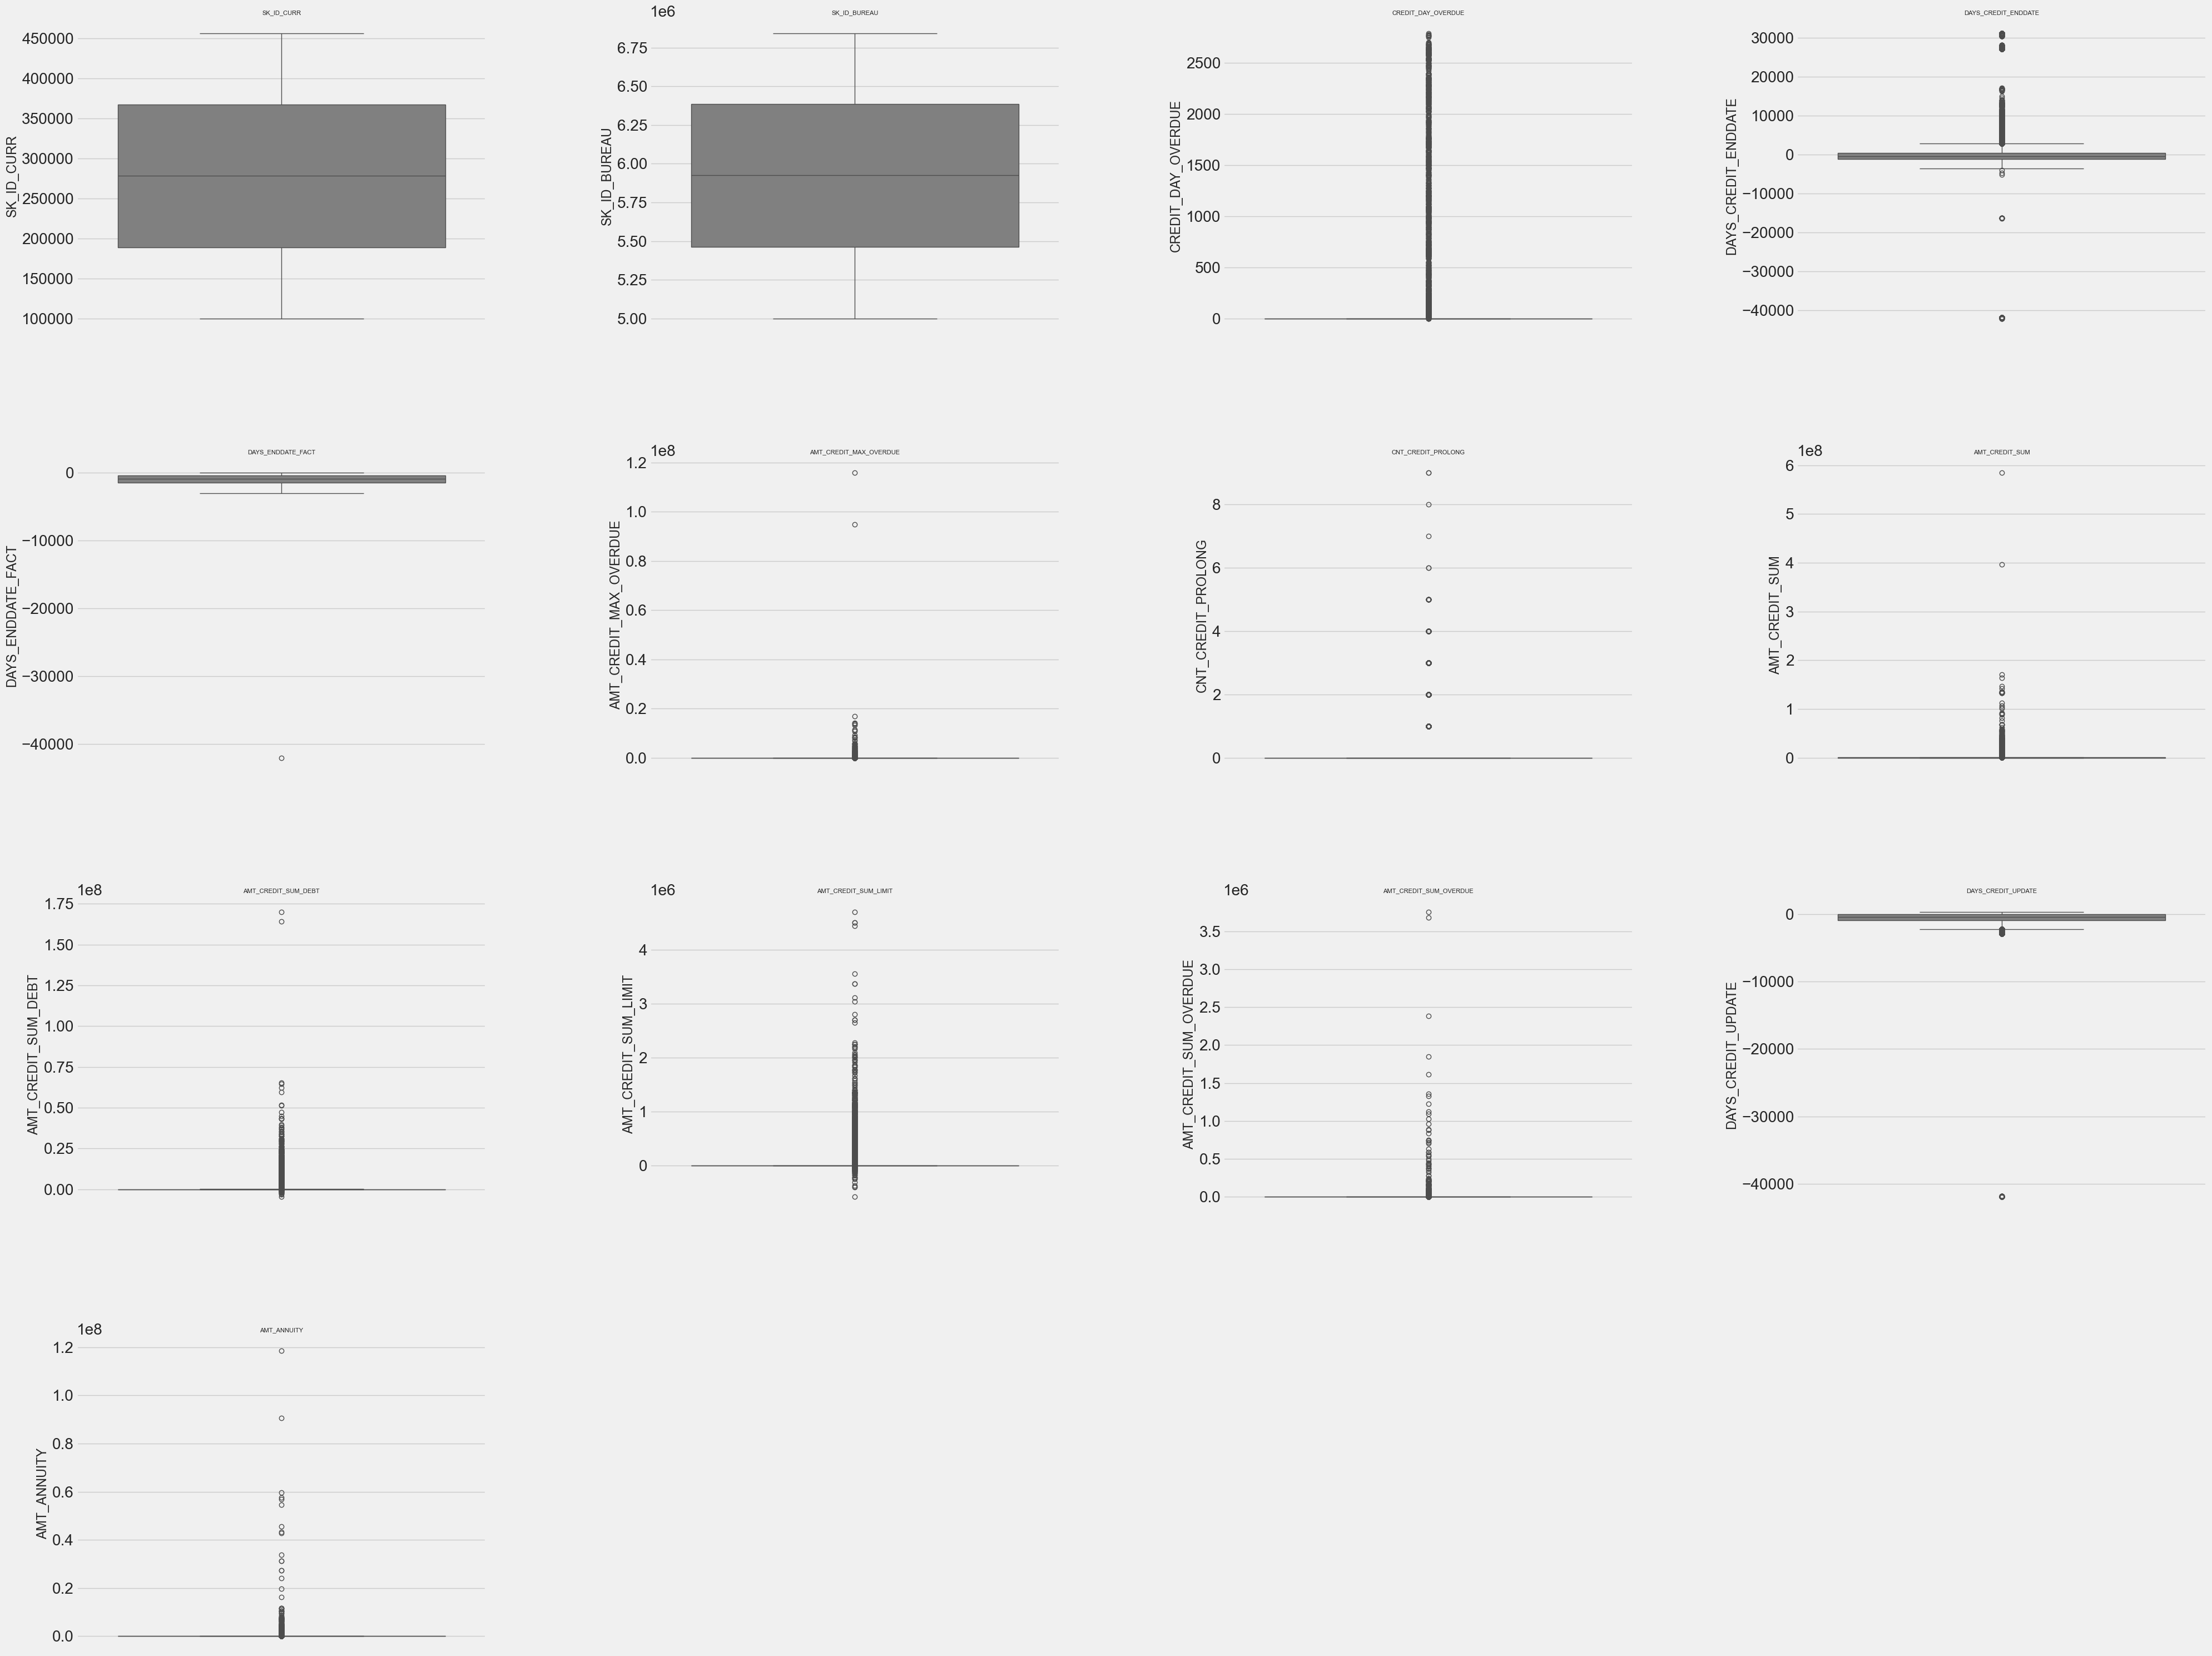

In [32]:
# Mengatur ukuran gambar lebih besar agar plot tidak terlalu padat
plt.figure(figsize=(40, 30))

for i in range(0, len(numerical_cols)):
    plt.subplot((len(numerical_cols) // 4) + 1, 4, i + 1)
    sns.boxplot(y=data[numerical_cols[i]], color='gray', orient='v')
    plt.title(numerical_cols[i], fontsize=8)
    plt.tight_layout()

plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()

- SK_ID_CURR:
Boxplot menunjukkan distribusi ID unik untuk nasabah (customer).<br>
Karena ini adalah identifier yang unik, grafik ini tidak memberikan wawasan khusus terkait analisis nilai, tetapi terlihat distribusi nilai ID tersebar dengan baik di seluruh rentang.

- SK_ID_BUREAU:
Seperti halnya SK_ID_CURR, grafik ini menunjukkan distribusi ID dari entitas biro kredit.<br> Ini adalah variabel kategorikal yang digunakan sebagai pengidentifikasi unik dan tidak memberikan insight numerik khusus selain distribusi nilai yang normal di rentangnya.

- CREDIT_DAY_OVERDUE: Grafik ini menunjukkan distribusi hari keterlambatan pembayaran kredit.<br> Terdapat outliers di bagian atas (nilai yang jauh lebih besar dari distribusi normal), yang mungkin mengindikasikan sejumlah kecil nasabah yang memiliki keterlambatan pembayaran yang sangat tinggi.
Sebagian besar nasabah tampaknya memiliki nilai keterlambatan yang mendekati 0, yang berarti kebanyakan dari mereka membayar tepat waktu atau hanya memiliki keterlambatan kecil.

- DAYS_CREDIT_ENDDATE: Variabel ini menunjukkan jumlah hari sampai kredit berakhir.<br> Terdapat outliers di kedua sisi, yang mungkin merepresentasikan nasabah yang memiliki kredit dengan jangka waktu yang jauh lebih panjang atau lebih pendek dari rata-rata.
Sebagian besar data terpusat di sekitar nilai mendekati 0, mengindikasikan kredit yang jatuh tempo dalam waktu dekat.

- DAYS_ENDDATE_FACT: Ini adalah waktu aktual di mana kredit berakhir<br>grafiknya menunjukkan beberapa outliers di bagian bawah (di bawah -40.000 hari), yang merupakan nilai yang sangat ekstrem dan mungkin merupakan anomali atau kesalahan data.
Sebagian besar kredit berakhir dalam rentang yang lebih masuk akal mendekati 0, seperti yang terlihat dari boxplot.

- AMT_CREDIT_MAX_OVERDUE: Variabel ini menunjukkan jumlah maksimum kredit yang belum dibayar (overdue).<br> Terdapat beberapa outliers yang sangat ekstrem, di mana jumlah overdue mencapai hampir 100 juta. Ini bisa mengindikasikan beberapa kasus nasabah dengan masalah kredit yang serius. Sebagian besar nilai overdue mendekati 0, yang berarti mayoritas nasabah tidak memiliki kredit yang terlambat dibayar atau hanya sedikit keterlambatan.

- CNT_CREDIT_PROLONG: Grafik ini menunjukkan jumlah perpanjangan kredit.<br> Sebagian besar nilai berada di 0, yang berarti sebagian besar nasabah tidak memperpanjang kredit mereka.
Terdapat beberapa outliers dengan nilai yang lebih tinggi (hingga 8 kali perpanjangan kredit), yang mungkin menunjukkan kasus-kasus nasabah yang sering melakukan perpanjangan.

- AMT_CREDIT_SUM: Ini adalah total jumlah kredit yang diambil oleh nasabah.<br> Terlihat ada beberapa outliers yang sangat besar (hingga mendekati 6 juta), yang menunjukkan beberapa nasabah dengan jumlah kredit yang sangat besar.
Sebagian besar kredit terdistribusi pada nilai yang lebih rendah, yang terlihat dari banyaknya data yang terkonsentrasi di dekat nilai 0.

- AMT_CREDIT_SUM_DEBT: Plot ini menunjukkan distribusi dari total jumlah utang kredit.<br>
Terlihat beberapa outliers yang sangat besar di atas 1.5x10⁸, menunjukkan adanya nasabah dengan utang yang sangat tinggi.
Sebagian besar data terkonsentrasi di nilai yang lebih rendah mendekati 0, menunjukkan bahwa sebagian besar nasabah memiliki jumlah utang yang relatif kecil.

- AMT_CREDIT_SUM_LIMIT: Ini menunjukkan total batas kredit yang diberikan kepada nasabah.<br>
Ada beberapa outliers di bagian atas (lebih dari 3 juta), mengindikasikan beberapa nasabah memiliki batas kredit yang sangat tinggi.
Sebagian besar nasabah memiliki batas kredit yang rendah atau bahkan 0, yang mengindikasikan mereka tidak diberikan batas kredit yang tinggi oleh pemberi pinjaman.

- AMT_CREDIT_SUM_OVERDUE: Plot ini menampilkan jumlah total kredit yang jatuh tempo.<br>
Terlihat beberapa outliers besar di atas 2 juta, mengindikasikan bahwa ada nasabah yang memiliki kredit yang jauh tertunggak.
Sebagian besar data mendekati 0, yang berarti mayoritas nasabah tidak memiliki kredit yang tertunggak atau keterlambatan pembayaran.

- DAYS_CREDIT_UPDATE: Variabel ini menunjukkan jumlah hari sejak pembaruan kredit terakhir.<br>
Ada satu outlier yang sangat rendah (sekitar -40.000 hari), yang mungkin merupakan kesalahan data atau anomali.
Sebagian besar data terpusat di sekitar nilai yang lebih masuk akal mendekati 0, yang berarti sebagian besar nasabah memiliki pembaruan kredit yang relatif baru.

- AMT_ANNUITY: Grafik ini menunjukkan distribusi jumlah annuitas (pembayaran cicilan per tahun).<br>
Ada beberapa outliers yang sangat besar (lebih dari 1x10⁸), yang mungkin merupakan indikasi nasabah dengan jumlah annuitas yang sangat tinggi.
Sebagian besar nilai mendekati 0, yang menunjukkan sebagian besar nasabah memiliki annuitas yang relatif kecil.

Kesimpulan:
1. Beberapa kolom seperti CREDIT_DAY_OVERDUE, AMT_CREDIT_MAX_OVERDUE, dan AMT_CREDIT_SUM menunjukkan adanya outliers yang signifikan, yang bisa menjadi indikasi pola perilaku tertentu dari nasabah, seperti keterlambatan besar dalam pembayaran kredit atau nasabah dengan jumlah kredit yang sangat besar.
2. Variabel CNT_CREDIT_PROLONG dan DAYS_CREDIT_ENDDATE juga menunjukkan sedikit outliers yang bisa dianalisis lebih lanjut, terutama terkait nasabah yang sering memperpanjang kredit atau memiliki kredit dengan durasi yang sangat panjang.
3. Kolom-kolom SK_ID_CURR dan SK_ID_BUREAU tidak memberikan wawasan penting karena mereka adalah identifier unik.
4. Beberapa variabel, seperti AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, AMT_CREDIT_SUM_OVERDUE, dan AMT_ANNUITY, menunjukkan adanya outliers yang signifikan. Ini mengindikasikan adanya nasabah dengan jumlah utang, batas kredit, atau annuitas yang sangat tinggi yang mungkin memerlukan analisis lebih lanjut.
5. Variabel DAYS_CREDIT_UPDATE memiliki satu outlier ekstrem, yang bisa jadi kesalahan data.
6. Distribusi sebagian besar variabel menunjukkan bahwa mayoritas nasabah berada pada nilai yang lebih rendah, dengan beberapa outliers yang dapat dipelajari lebih dalam untuk mengetahui pola perilaku kredit yang ekstrim.

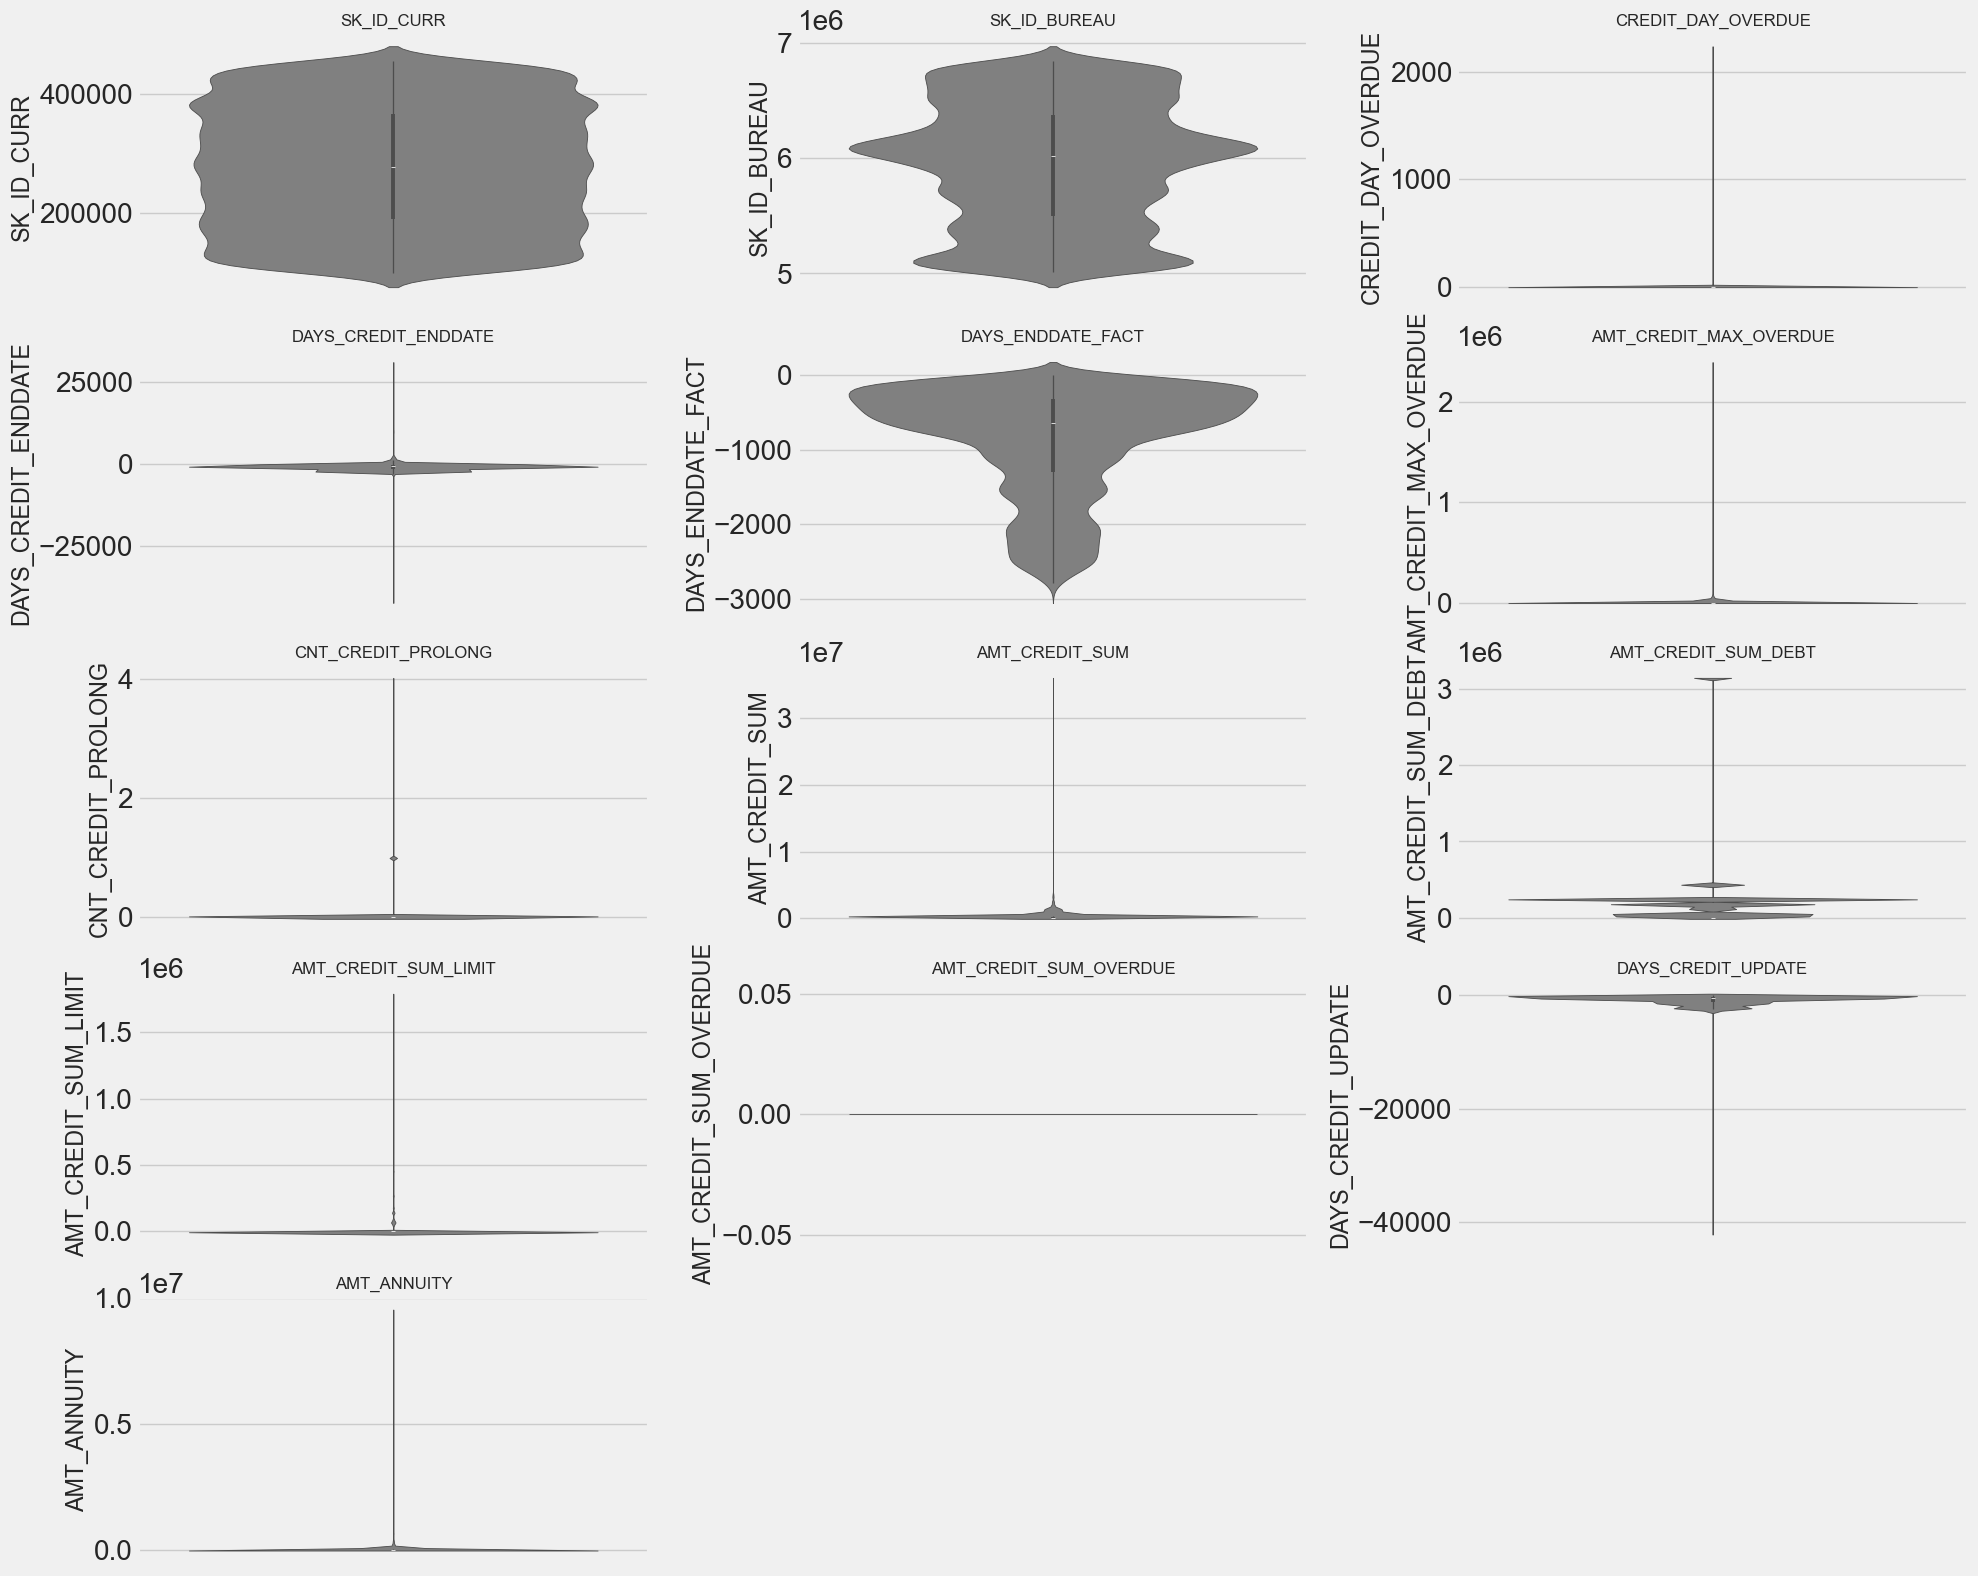

In [259]:
plt.figure(figsize=(20, 16))

# Tentukan jumlah subplot per baris (misalnya, 3 per baris)
rows = (len(numerical_cols) // 3) + 1  # Sesuaikan jumlah baris dengan fitur
cols = 3                               # Maksimum 3 kolom per baris

# Loop untuk membuat subplot
for i in range(len(numerical_cols)):
    plt.subplot(rows, cols, i + 1)
    sns.violinplot(y=data[numerical_cols[i]], color='gray', orient='v')
    plt.title(numerical_cols[i], fontsize=12)  # Perbesar font judul
    plt.xticks(rotation=45)                    # Rotasi label agar lebih mudah dibaca

# Tata letak agar subplot tidak tumpang tindih
plt.tight_layout()

# Tampilkan plot
plt.show()

**Analisa :**<br>
- SK_ID_CURR:<br>
Distribusi ID pelanggan terlihat cukup seragam, dengan distribusi yang mendekati normal. Tidak ada outlier yang mencolok, dan data ini lebih bersifat kategorikal atau identitas sehingga mungkin tidak terlalu relevan untuk pemodelan prediktif.<br>

- SK_ID_BUREAU:<br>
Distribusi SK_ID_BUREAU menunjukkan pola yang mirip dengan SK_ID_CURR. Ini adalah identitas atau kode unik dan tidak memberikan informasi prediktif langsung terkait dengan variabel target. Fitur ini juga bisa dianggap sebagai identifikasi unik dan kemungkinan tidak diperlukan dalam model.<br>

- DAYS_CREDIT_ENDDATE:<br>
Distribusi DAYS_CREDIT_ENDDATE sangat terpusat di sekitar nol. Ini menunjukkan bahwa sebagian besar data memiliki waktu yang sangat dekat dengan waktu kredit berakhir. Ada sedikit variasi di nilai positif maupun negatif, yang mungkin berguna untuk memprediksi durasi atau penyelesaian kredit.

- DAYS_ENDDATE_FACT:<br>
Pola violin menunjukkan distribusi yang jauh lebih simetris dibandingkan DAYS_CREDIT_ENDDATE, dengan beberapa nilai yang jauh dari pusat distribusi. Nilai negatif menandakan bahwa ada banyak nasabah yang sudah menutup kredit, sedangkan ada beberapa yang belum.

- CREDIT_DAY_OVERDUE:<br>
Mayoritas data menunjukkan tidak ada keterlambatan (overdue), dengan hanya sedikit distribusi yang terlihat pada nilai-nilai di atas 0. Ini bisa menjadi fitur penting, karena nasabah yang memiliki nilai tinggi dalam overdue mungkin memiliki risiko kredit yang lebih tinggi.

- AMT_CREDIT_MAX_OVERDUE:<br>
Sebagian besar nasabah tidak memiliki keterlambatan maksimum, dengan distribusi terkonsentrasi di nol. Namun, ada beberapa outlier pada nasabah yang memiliki keterlambatan signifikan. Ini bisa menjadi indikator penting dalam menentukan risiko gagal bayar.

- CNT_CREDIT_PROLONG:<br>
Hampir semua distribusi berada pada nilai 0, menunjukkan bahwa kebanyakan nasabah tidak memperpanjang kredit mereka. Namun, beberapa outlier terlihat, yang menunjukkan adanya kasus-kasus di mana nasabah memperpanjang durasi kredit. Ini mungkin relevan untuk mengukur risiko.

- AMT_CREDIT_SUM:<br>
Distribusi untuk AMT_CREDIT_SUM menunjukkan beberapa perbedaan besar antar nasabah, dengan sebagian besar berada di bawah 1 juta tetapi ada nasabah dengan kredit yang sangat tinggi. Fitur ini penting untuk memahami besaran kredit yang diterima oleh nasabah.

- AMT_CREDIT_SUM_DEBT:<br>
Ada kemiripan pola dengan AMT_CREDIT_SUM, tetapi sebagian besar nasabah memiliki jumlah utang yang jauh lebih rendah, dan distribusi ini menunjukkan lebih banyak variasi. Bisa digunakan sebagai indikator kemampuan membayar.

- AMT_CREDIT_SUM_LIMIT:
Fitur ini juga memiliki distribusi yang sangat tidak seimbang, dengan sebagian besar nasabah memiliki batas kredit yang relatif rendah. Namun, beberapa nasabah memiliki limit yang sangat tinggi, yang bisa memberikan gambaran tentang kapasitas kredit mereka.

- AMT_CREDIT_SUM_OVERDUE:<br>
Mayoritas nasabah tidak memiliki utang yang overdue, dengan distribusi terkonsentrasi di nol. Namun, beberapa outlier menunjukkan adanya nasabah yang memiliki utang yang sangat tinggi. Fitur ini mungkin memiliki pengaruh besar pada risiko kredit.

- DAYS_CREDIT_UPDATE:<br>
Sebagian besar nasabah memiliki nilai di sekitar nol atau negatif. Ini menunjukkan kapan kredit terakhir kali diperbarui, dan distribusinya mungkin bisa digunakan untuk memprediksi perilaku pembayaran terbaru.

- AMT_ANNUITY:<br>
Fitur ini menunjukkan distribusi yang relatif simetris, dengan mayoritas nasabah memiliki anuitas yang cukup rendah. Beberapa nasabah memiliki anuitas yang jauh lebih tinggi, yang mungkin relevan untuk menilai kemampuan mereka untuk membayar cicilan.

**Kesimpulan Umum:** <br>
- Fitur-fitur seperti CREDIT_DAY_OVERDUE, AMT_CREDIT_MAX_OVERDUE, dan AMT_CREDIT_SUM_DEBT mungkin merupakan fitur penting yang harus dipertahankan karena mereka memberikan indikasi langsung tentang risiko pembayaran.
- Fitur seperti SK_ID_CURR dan SK_ID_BUREAU mungkin dapat dihapus atau diabaikan karena mereka bersifat identifikasi dan tidak membawa informasi prediktif yang kuat.
- Distribusi yang sangat tidak seimbang, seperti CNT_CREDIT_PROLONG dan AMT_CREDIT_SUM_OVERDUE, mungkin memerlukan perhatian khusus dalam pemodelan karena mereka memiliki banyak nilai nol dan beberapa outlier.

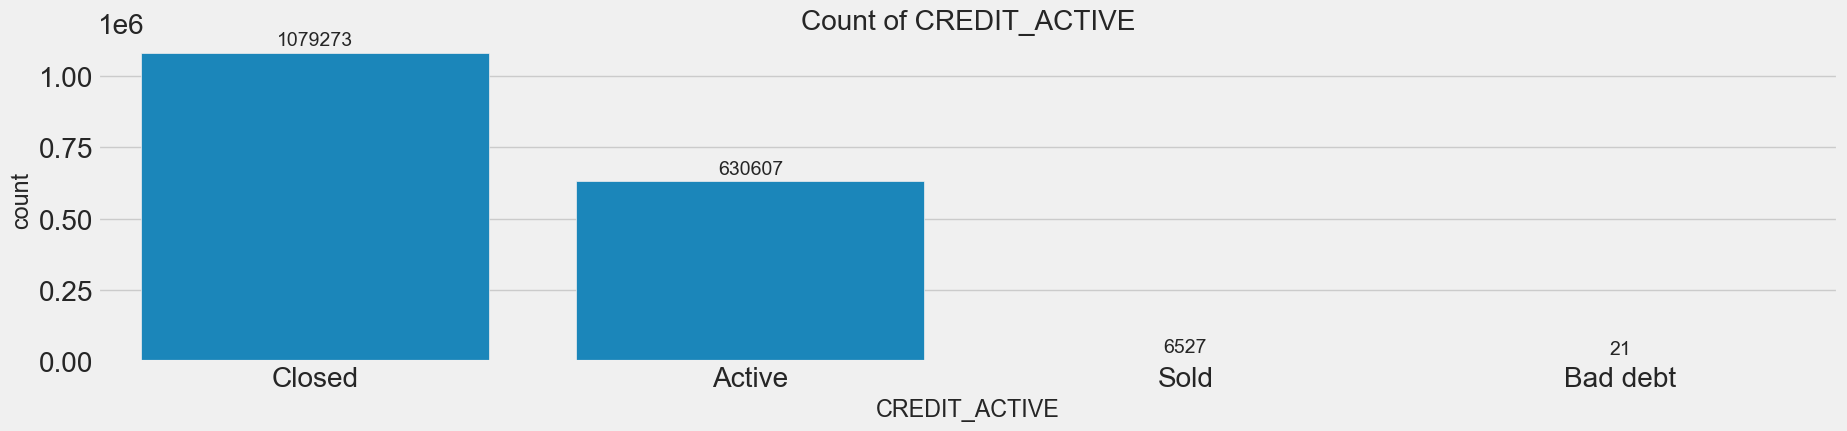

In [78]:
# Define the custom order for specific categorical columns
CREDIT_ACTIVE: ['Closed', 'Active', 'Sold', 'Bad debt']

CREDIT_CURRENCY: ['currency 1', 'currency 2', 'currency 4', 'currency 3']

CREDIT_TYPE: ['Consumer credit', 'Credit card', 'Mortgage', 'Car loan', 'Microloan', 'Loan for working capital replenishment', 'Loan for business development', 'Real estate loan' 'Unknown type of loan', 'Another type of loan', 'Cash loan (non-earmarked)', 'Loan for the purchase of equipment',
              'Mobile operator loan', 'Interbank credit', 'Loan for purchase of shares (margin lending)']

# Visualization Functions

def visualize_column(data, col):
    plt.figure(figsize=(20, 4))

    # Check if the column has a custom order
    if col == 'Location_Type':
        plot = sns.countplot(x=col, data=data, order=location_type_order)
    elif col == 'Store_Type':
        plot = sns.countplot(x=col, data=data, order=store_type_order)
    elif col == 'Region_Code':
        plot = sns.countplot(x=col, data=data, order=region_code_order)
    elif col == 'Holiday':
        plot = sns.countplot(x=col, data=data, order=holiday_order)
    elif col == 'Discount':
        plot = sns.countplot(x=col, data=data, order=discount_order)
    else:
        plot = sns.countplot(x=col, data=data)

    # Add labels to each bar
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9), textcoords = 'offset points')

    plt.title(f'Count of {col}')
    plt.show()

# Now, you can call the function for each individual column
visualize_column(data, 'CREDIT_ACTIVE')

 Untuk kolom CREDIT_ACTIVE, bisa dilihat bahwa kondisi Closed memiliki angka dengan jumlah lokasi terbesar dengan angka 1079273 unit. Diikuti dengan Active dengan 630607 unit, Sold dengan 6527 unit,dan Bad debt dengan 21 unit.

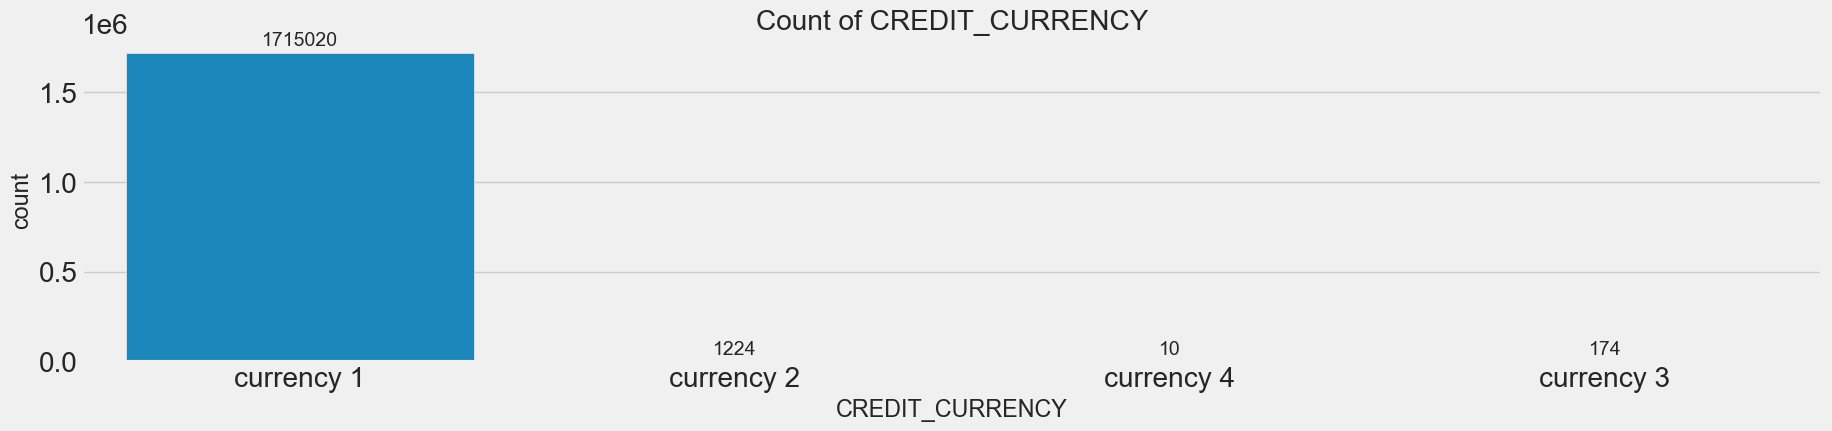

In [50]:
visualize_column(data, 'CREDIT_CURRENCY')

Untuk kolom CREDIT_CURRENCY, bisa dilihat bahwa 'currency 1' memiliki angka jumlah terbesar dengan angka 1715020 unit. Diikuti dengan currency 2 dengan 1224 unit, currency 4 dengan 10 unit dan currency 3 dengan 174 unit.


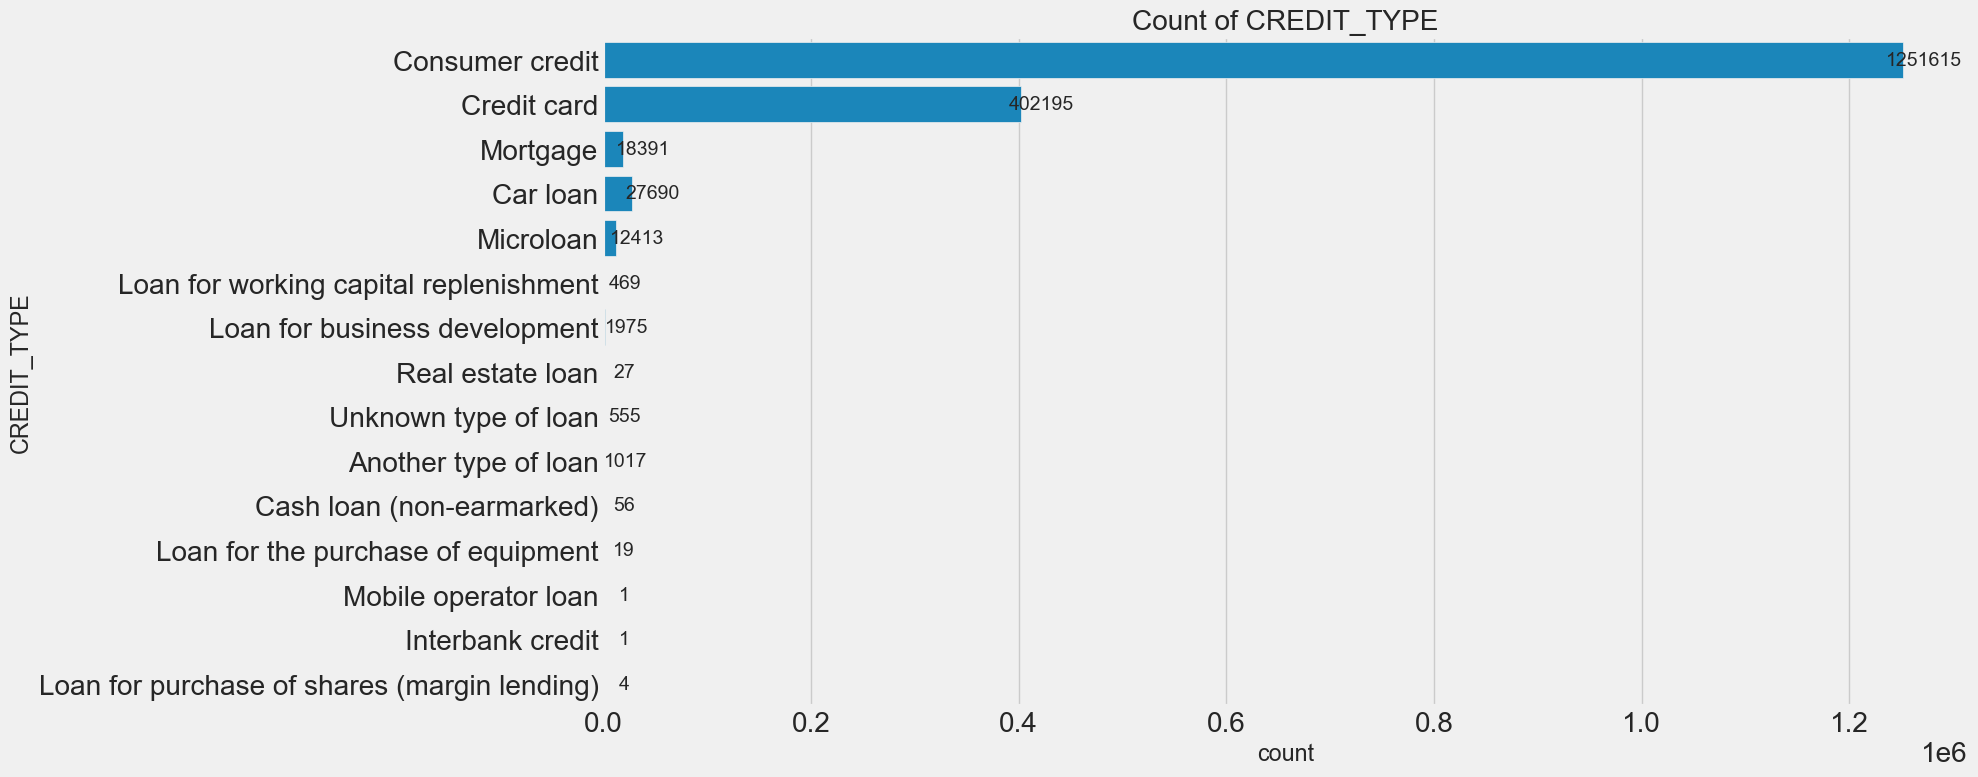

In [100]:
# Visualization Function (with x and y swapped)
def visualize_column(data, col):
    plt.figure(figsize=(20, 8))  # Adjusted size for horizontal plot

    # Check if the column has a custom order
    if col == 'Location_Type':
        plot = sns.countplot(y=col, data=data, order=location_type_order)
    elif col == 'Store_Type':
        plot = sns.countplot(y=col, data=data, order=store_type_order)
    elif col == 'Region_Code':
        plot = sns.countplot(y=col, data=data, order=region_code_order)
    elif col == 'Holiday':
        plot = sns.countplot(y=col, data=data, order=holiday_order)
    elif col == 'Discount':
        plot = sns.countplot(y=col, data=data, order=discount_order)
    else:
        plot = sns.countplot(y=col, data=data)  # Changed 'x' to 'y' for horizontal bars

    # Add labels to each bar (rotated for horizontal)
    for p in plot.patches:
        plot.annotate(format(p.get_width(), '.0f'),  # Adjusted for horizontal width
                      (p.get_width(), p.get_y() + p.get_height() / 2.),
                      ha='center', va='center',
                      xytext=(15, 0), textcoords='offset points')  # Adjust position for clarity

    plt.title(f'Count of {col}')
    plt.tight_layout()  # Ensures labels fit within the plot
    plt.show()

# Now, you can call the function for each individual column

visualize_column(data, 'CREDIT_TYPE')

Untuk kolom CREDIT_TYPE, bisa dilihat bahwa 'Consumer Credit' memiliki jumlah terbesar dengan 1251615 unit. Diikuti dengan 'Credit card' dengan 402195 unit dan dengan jumlah paling sedikit yaitu 1 pada 'Mobile operator loan' dan 'interbank credit'.

#### Kesimpulan

1. Pola Umum pada Data Kredit:<br>
Sebagian besar nasabah memiliki profil kredit yang sehat, seperti terlihat dari variabel seperti CREDIT_DAY_OVERDUE, AMT_CREDIT_MAX_OVERDUE, dan CNT_CREDIT_PROLONG, di mana sebagian besar nasabah tidak memiliki keterlambatan pembayaran atau perpanjangan kredit.
Sebagian besar nilai dari variabel-variabel terkait kredit tertunggak dan jumlah kredit berada di sekitar 0 atau rendah, menunjukkan bahwa mayoritas nasabah memiliki profil kredit yang teratur.
Namun, ada outliers yang signifikan pada beberapa variabel, terutama yang terkait dengan jumlah kredit tertunggak dan total jumlah kredit (AMT_CREDIT_MAX_OVERDUE dan AMT_CREDIT_SUM). Ini menunjukkan bahwa meskipun sebagian besar nasabah teratur, ada beberapa nasabah dengan risiko tinggi atau kredit dalam jumlah besar.
2. Outliers yang Signifikan:<br>
Dari analisis boxplot dan scatter plot, kita bisa mengidentifikasi bahwa ada beberapa outliers yang cukup ekstrem di berbagai variabel seperti AMT_CREDIT_SUM_DEBT, DAYS_CREDIT_ENDDATE, dan AMT_CREDIT_MAX_OVERDUE.
Outliers ini menunjukkan adanya nasabah yang memiliki total kredit sangat tinggi atau kredit yang sudah jatuh tempo dalam jumlah besar, yang mungkin memerlukan perhatian khusus dalam analisis risiko.
3. Distribusi yang Terpusat di Nilai Rendah:<br>
Density plot menunjukkan sebagian besar data terkonsentrasi pada nilai rendah untuk variabel-variabel seperti CREDIT_DAY_OVERDUE dan AMT_CREDIT_MAX_OVERDUE. Ini menegaskan bahwa mayoritas nasabah memiliki kredit yang tertunggak dalam jumlah kecil atau tidak sama sekali.
Untuk variabel DAYS_CREDIT_ENDDATE dan DAYS_ENDDATE_FACT, kebanyakan data berada di sekitar 0, yang mengindikasikan bahwa sebagian besar kredit nasabah masih aktif atau baru saja berakhir. Namun, ada beberapa kredit yang jatuh tempo sudah lama atau masih jauh di masa depan.

- Kesimpulan Umum:<br>
Mayoritas nasabah memiliki kondisi kredit yang stabil dengan jumlah kredit tertunggak yang rendah atau tidak ada sama sekali.
Outliers menunjukkan adanya nasabah dengan risiko tinggi atau jumlah kredit yang sangat besar, yang mungkin perlu diinvestigasi lebih lanjut.
Distribusi data yang terkonsentrasi di nilai rendah untuk variabel kredit menunjukkan pola umum bahwa sebagian besar nasabah mungkin melakukan pembayaran tepat waktu atau memiliki kredit dalam jumlah moderat.
Analisis lebih lanjut, seperti pemeriksaan lebih dalam terhadap outliers atau segmentasi nasabah berdasarkan profil risiko, dapat membantu meningkatkan pemahaman tentang pola kredit ini.

### b) Multivariate Analysis

In [36]:
data[numerical_cols].corr()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,1.000000,0.000135,0.000283,0.000456,-0.000648,0.001329,-0.000388,0.001179,-0.000790,-0.000304,-0.000014,0.000510,-0.002727
SK_ID_BUREAU,0.000135,1.000000,-0.002628,0.009107,0.017890,0.002290,-0.000740,0.007962,0.005732,-0.003986,-0.000499,0.019398,0.001799
CREDIT_DAY_OVERDUE,0.000283,-0.002628,1.000000,-0.007352,-0.008637,0.001249,0.002756,-0.003292,-0.002355,-0.000345,0.090951,-0.018461,-0.000339
DAYS_CREDIT_ENDDATE,0.000456,0.009107,-0.007352,1.000000,0.248825,0.000577,0.113683,0.055424,0.081298,0.095421,0.001077,0.248525,0.000475
DAYS_ENDDATE_FACT,-0.000648,0.017890,-0.008637,0.248825,1.000000,0.000999,0.012017,0.059096,0.019609,0.019476,-0.000332,0.751294,0.006274
AMT_CREDIT_MAX_OVERDUE,0.001329,0.002290,0.001249,0.000577,0.000999,1.000000,0.001523,0.081663,0.014007,-0.000112,0.015036,-0.000749,0.001578
CNT_CREDIT_PROLONG,-0.000388,-0.000740,0.002756,0.113683,0.012017,0.001523,1.000000,-0.008345,-0.001366,0.073805,0.000002,0.017864,-0.000465
AMT_CREDIT_SUM,0.001179,0.007962,-0.003292,0.055424,0.059096,0.081663,-0.008345,1.000000,0.683419,0.003756,0.006342,0.104629,0.049146
AMT_CREDIT_SUM_DEBT,-0.000790,0.005732,-0.002355,0.081298,0.019609,0.014007,-0.001366,0.683419,1.000000,-0.018215,0.008046,0.141235,0.025507
AMT_CREDIT_SUM_LIMIT,-0.000304,-0.003986,-0.000345,0.095421,0.019476,-0.000112,0.073805,0.003756,-0.018215,1.000000,-0.000687,0.046028,0.004392


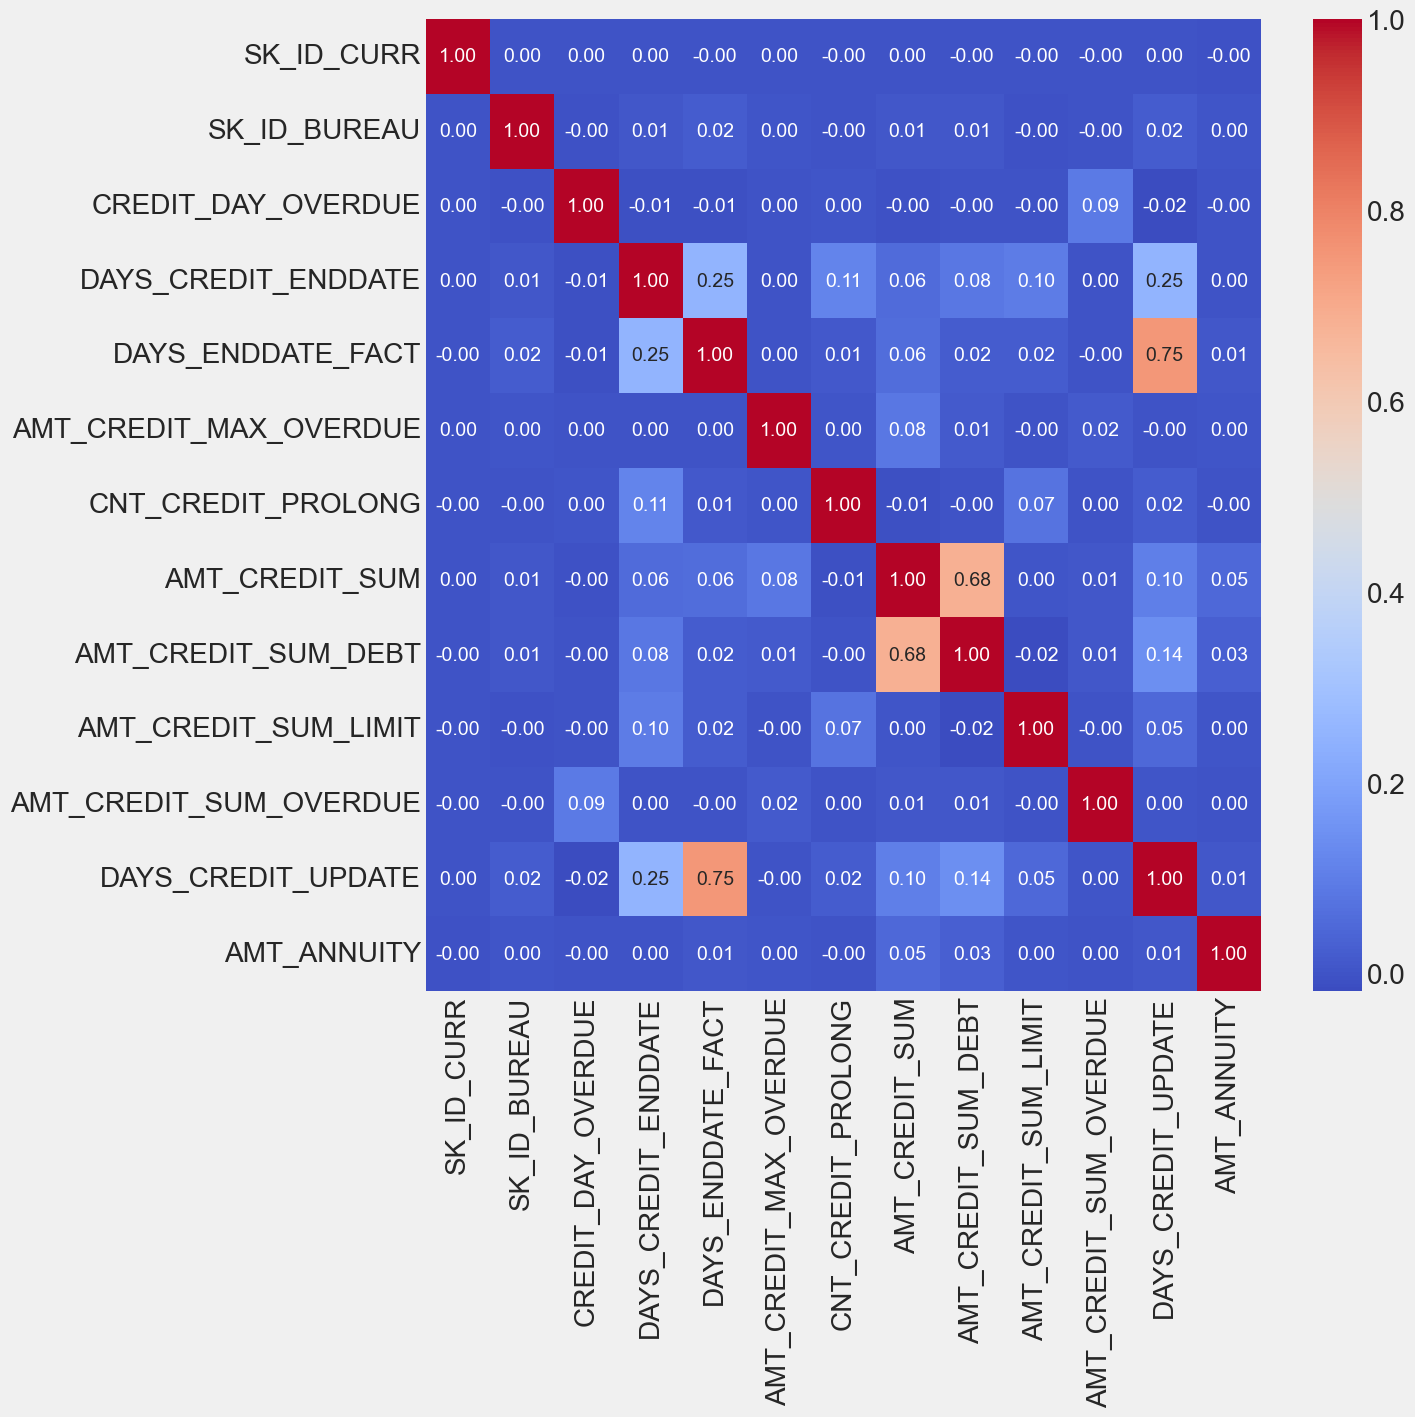

In [33]:
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(data[numerical_cols].corr(), cmap='coolwarm', annot=True, fmt='.2f')

In [35]:
# Solution: Use Sparse Matrix Format to Reduce Memory Usage
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Initialize OneHotEncoder with sparse matrix format
encoder = OneHotEncoder(sparse_output=True)

# 2. Fit and transform the categorical columns
one_hot_encoded_data = encoder.fit_transform(data[categorical_cols])

# 3. Convert sparse matrix to sparse DataFrame
one_hot_encoded_df = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# 4. Combine the encoded DataFrame with the original DataFrame (excluding categorical columns)
result_df = pd.concat([data.drop(columns=categorical_cols), one_hot_encoded_df], axis=1)

# Display the final DataFrame
result_df


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,...,0,0,0,0,0,0,0,0,0,0
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,...,0,0,0,0,0,0,0,0,0,0
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.50,NaN,...,0,0,0,0,0,0,0,0,0,0
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.00,NaN,...,0,0,0,0,0,0,0,0,0,0
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,...,0,0,0,0,0,1.0,0,0,0,0
1716424,100044,5057754,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,...,0,0,0,0,0,0,0,0,0,0
1716425,100044,5057762,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,...,0,0,0,0,0,0,0,0,0,0
1716426,246829,5057770,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 37 columns):
 #   Column                                                    Dtype             
---  ------                                                    -----             
 0   SK_ID_CURR                                                int64             
 1   SK_ID_BUREAU                                              int64             
 2   DAYS_CREDIT                                               int64             
 3   CREDIT_DAY_OVERDUE                                        int64             
 4   DAYS_CREDIT_ENDDATE                                       float64           
 5   DAYS_ENDDATE_FACT                                         float64           
 6   AMT_CREDIT_MAX_OVERDUE                                    float64           
 7   CNT_CREDIT_PROLONG                                        int64             
 8   AMT_CREDIT_SUM                                            floa

HeatMap After One Hot Encoding

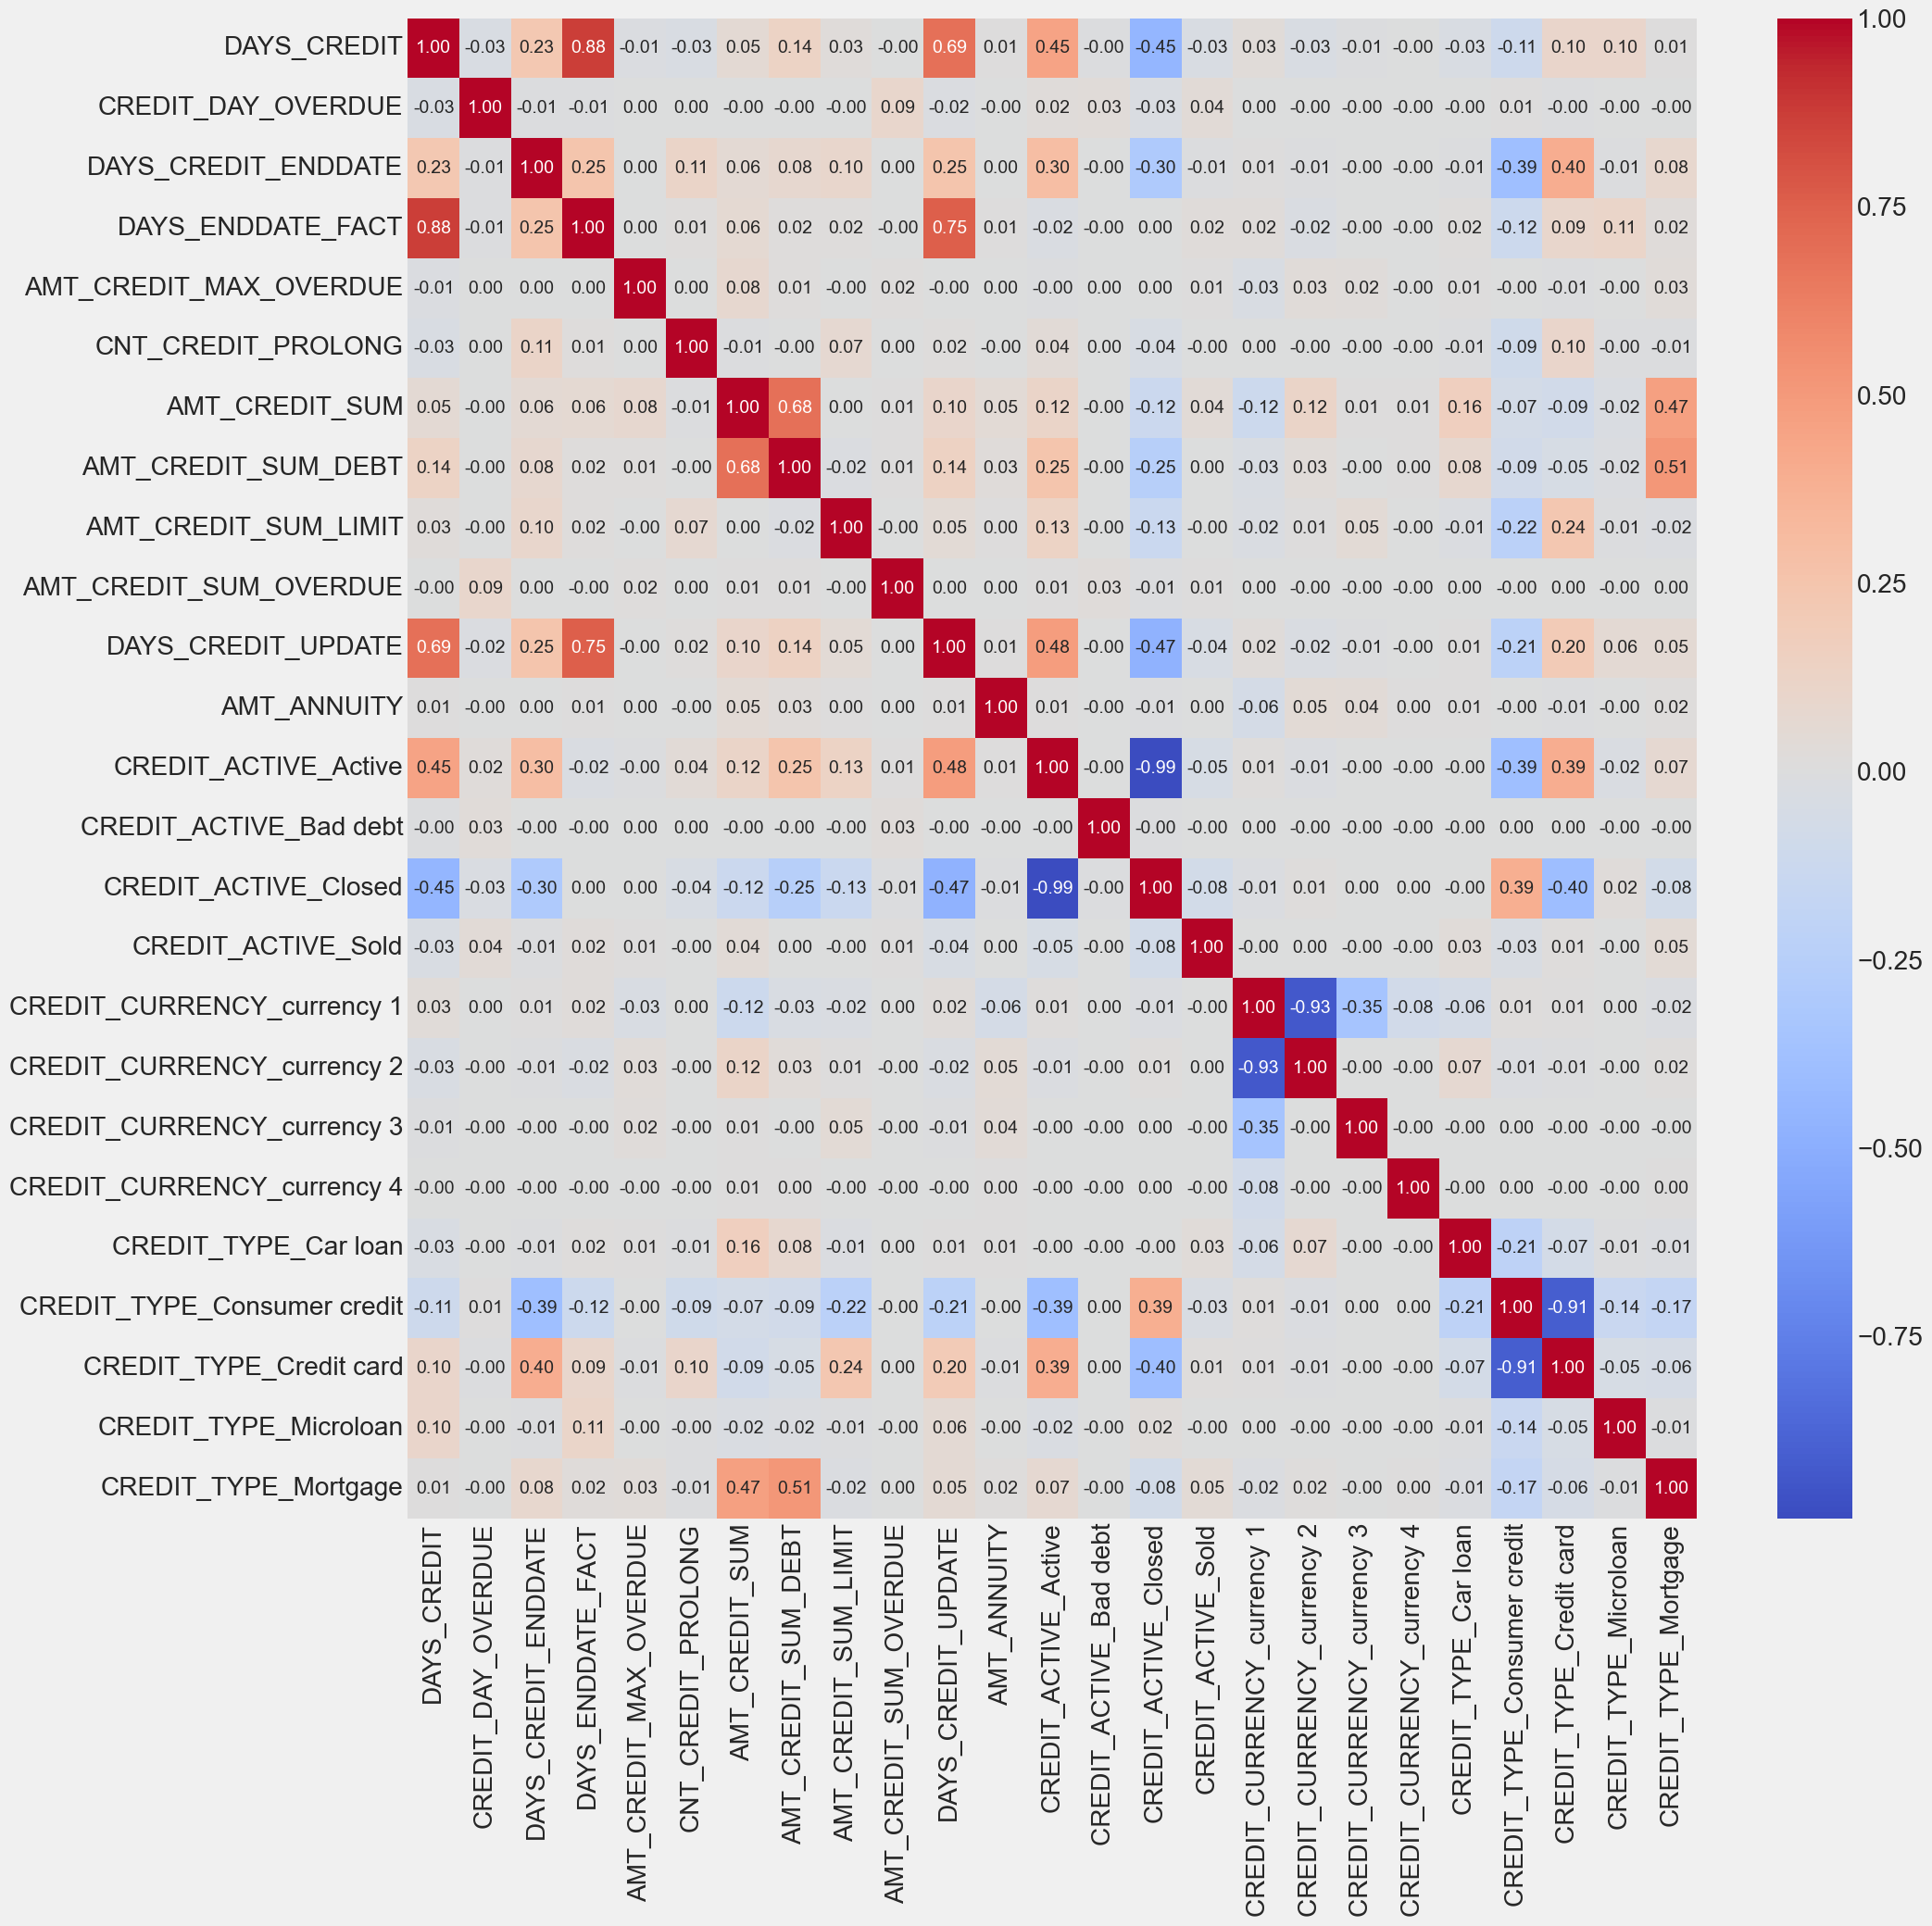

In [39]:
nums = ['DAYS_CREDIT',                                      
        'CREDIT_DAY_OVERDUE',                                     
        'DAYS_CREDIT_ENDDATE',                                    
        'DAYS_ENDDATE_FACT',                                   
        'AMT_CREDIT_MAX_OVERDUE',                                  
        'CNT_CREDIT_PROLONG',                              
        'AMT_CREDIT_SUM',                               
        'AMT_CREDIT_SUM_DEBT' ,                              
        'AMT_CREDIT_SUM_LIMIT',                              
        'AMT_CREDIT_SUM_OVERDUE',                             
        'DAYS_CREDIT_UPDATE',                             
        'AMT_ANNUITY',                           
        'CREDIT_ACTIVE_Active',                          
        'CREDIT_ACTIVE_Bad debt',                         
        'CREDIT_ACTIVE_Closed',                        
        'CREDIT_ACTIVE_Sold',                       
        'CREDIT_CURRENCY_currency 1',                      
        'CREDIT_CURRENCY_currency 2',                     
        'CREDIT_CURRENCY_currency 3',                    
        'CREDIT_CURRENCY_currency 4',              
        'CREDIT_TYPE_Car loan',                             
        'CREDIT_TYPE_Consumer credit',               
        'CREDIT_TYPE_Credit card',
        'CREDIT_TYPE_Microloan',
        'CREDIT_TYPE_Mortgage'
       ]

plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(result_df[nums].corr(), cmap='coolwarm', annot=True, fmt='.2f')

In [41]:
# Misalnya, data adalah DataFrame yang berisi variabel numerik
sns.pairplot(data[numerical_cols])
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000026CD2CE5A80> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



# 4. Korelasi antara masing-masing feature dan label

Penjelasan Korelasi antara Sales dan #Order dengan feature/label lainnya
1. **Korelasi Positif Tinggi antara Fitur Kredit**:<br>
- AMT_CREDIT_SUM vs AMT_CREDIT_SUM_DEBT (korelasi ~0.88):<br>
Ini menunjukkan bahwa jumlah total kredit yang diberikan (AMT_CREDIT_SUM) sangat berkorelasi dengan jumlah total utang yang masih ada (AMT_CREDIT_SUM_DEBT). Hal ini masuk akal karena semakin besar kredit yang diberikan, semakin besar pula jumlah utang yang mungkin tersisa.
- AMT_CREDIT_SUM vs AMT_CREDIT_SUM_LIMIT (korelasi ~0.88):<br>
Jumlah total kredit juga sangat berkorelasi dengan batas kredit. Ini menunjukkan bahwa klien dengan batas kredit lebih tinggi cenderung memiliki jumlah kredit yang lebih besar.
- AMT_CREDIT_SUM_OVERDUE vs AMT_CREDIT_MAX_OVERDUE (korelasi ~0.75):<br>
Keterlambatan pembayaran maksimum (AMT_CREDIT_MAX_OVERDUE) memiliki korelasi yang tinggi dengan jumlah kredit yang sedang tertunggak (AMT_CREDIT_SUM_OVERDUE). Fitur-fitur ini menggambarkan perilaku kredit yang kurang baik dan mungkin relevan untuk model risiko kredit.
- AMT_CREDIT_SUM vs AMT_ANNUITY (korelasi ~0.47):<br>
Ada hubungan moderat antara jumlah kredit total dan jumlah anuitas yang harus dibayar. Semakin besar kredit, semakin besar juga cicilan anuitasnya, meskipun korelasinya tidak setinggi fitur lainnya.<br>

2. **Korelasi Negatif yang Menarik:** <br>
- CREDIT_ACTIVE_Closed vs DAYS_CREDIT (korelasi ~-0.45):<br>
Fitur CREDIT_ACTIVE_Closed memiliki korelasi negatif dengan DAYS_CREDIT (jumlah hari sejak kredit terakhir). Artinya, semakin lama sejak klien terakhir kali mengambil kredit, semakin besar kemungkinan kredit tersebut sudah ditutup.
- DAYS_CREDIT vs CREDIT_ACTIVE_Bad debt (korelasi ~-0.45):<br>
Semakin lama kredit terakhir, semakin rendah kemungkinan utang tersebut dianggap buruk atau macet. Ini mungkin menunjukkan bahwa utang yang lebih lama cenderung sudah diselesaikan atau tidak lagi dianggap berisiko.<br>

4. **Fitur Status Aktif Kredit:** <br>
- CREDIT_ACTIVE_Active vs AMT_CREDIT_SUM_DEBT (korelasi ~0.39):<br>
Korelasi positif antara status kredit aktif dan jumlah utang yang belum dibayar. Ini menunjukkan bahwa klien yang masih aktif memiliki kemungkinan besar memiliki utang yang masih berjalan.
- CREDIT_ACTIVE_Active vs AMT_CREDIT_SUM_OVERDUE (korelasi ~0.25):<br>
Status kredit aktif juga berkorelasi dengan keterlambatan pembayaran. Jika klien memiliki kredit yang masih aktif, ada kemungkinan mereka juga memiliki pembayaran yang tertunggak.<br>

5. **Hubungan antara Jenis Mata Uang Kredit:** <br>
- CREDIT_CURRENCY_currency 1, currency 2, currency 3, dan currency 4:<br>
Terdapat korelasi tinggi antara fitur yang berkaitan dengan mata uang yang digunakan untuk kredit. Mata uang 2 dan mata uang 3, misalnya, memiliki korelasi sekitar 0.93. Ini mungkin menunjukkan adanya preferensi mata uang untuk jenis kredit tertentu di pasar ini, atau bisa jadi mata uang-mata uang ini sering digunakan bersamaan.<br>

6. **Korelasi pada Tipe Kredit:** 
- CREDIT_TYPE_Mortgage vs AMT_CREDIT_SUM (korelasi ~0.57):<br>
Kredit untuk hipotek (mortgage) sangat berkorelasi dengan jumlah kredit total. Hipotek biasanya melibatkan jumlah kredit yang besar, sehingga wajar jika fitur ini berkorelasi tinggi dengan AMT_CREDIT_SUM.
- CREDIT_TYPE_Car loan vs AMT_CREDIT_SUM (korelasi ~0.16):<br>
Kredit mobil memiliki korelasi rendah dengan jumlah kredit total, menunjukkan bahwa jumlah kredit untuk pinjaman mobil mungkin lebih kecil dibandingkan jenis pinjaman lain seperti hipotek.
- CREDIT_TYPE_Consumer credit vs AMT_CREDIT_SUM_OVERDUE (korelasi ~0.22):<br>
Pinjaman konsumen (consumer credit) menunjukkan sedikit korelasi dengan keterlambatan pembayaran kredit. Meskipun korelasinya tidak sangat kuat, ini bisa menandakan bahwa pinjaman konsumen lebih mungkin memiliki pembayaran tertunggak dibandingkan beberapa jenis kredit lain.<br>

# 5.Kesimpulan Tindakan Antar Fitur

## Fitur yang Harus Dipertahankan:
Fitur-fitur ini memiliki korelasi yang kuat dengan fitur lain yang penting atau menunjukkan relevansi signifikan dalam menggambarkan perilaku kredit.

1. AMT_CREDIT_SUM: Korelasi kuat dengan banyak fitur lain seperti AMT_CREDIT_SUM_DEBT (0.88) dan AMT_CREDIT_SUM_LIMIT (0.88). Ini adalah fitur penting yang menggambarkan total kredit, sangat relevan dalam analisis kredit.

2. AMT_CREDIT_SUM_DEBT: Jumlah utang yang tersisa dari kredit sangat penting untuk mengevaluasi risiko dan kemampuan pembayaran. Korelasinya yang kuat dengan AMT_CREDIT_SUM (0.88) menunjukkan bahwa fitur ini penting untuk menggambarkan kewajiban kredit.

3. AMT_CREDIT_MAX_OVERDUE: Korelasi tinggi dengan AMT_CREDIT_SUM_OVERDUE (0.75) menunjukkan bahwa fitur ini penting untuk menggambarkan riwayat keterlambatan pembayaran yang besar, relevan untuk mengevaluasi risiko kredit.

4. CREDIT_ACTIVE_Active: Fitur ini menggambarkan status kredit yang masih aktif dan menunjukkan korelasi positif dengan AMT_CREDIT_SUM_DEBT (0.39). Fitur ini penting untuk menentukan status keuangan saat ini.

5. DAYS_CREDIT: Korelasi kuat dengan beberapa fitur terkait seperti DAYS_ENDDATE_FACT (0.88). Fitur ini berguna untuk menentukan waktu terkait kredit yang terakhir kali diberikan.

6. CREDIT_TYPE_Mortgage: Memiliki korelasi moderat dengan AMT_CREDIT_SUM (0.57), penting karena pinjaman hipotek biasanya bernilai tinggi dan berisiko jangka panjang.

7. CREDIT_TYPE_Consumer credit: Korelasi moderat dengan AMT_CREDIT_SUM_OVERDUE (0.22). Ini menunjukkan bahwa pinjaman konsumen memiliki relevansi dalam analisis risiko keterlambatan pembayaran.


## Fitur yang Bisa Dihapus (Redundant atau Kurang Relevan):
Fitur-fitur ini memiliki korelasi yang rendah dengan fitur lain, atau sangat berkorelasi dengan fitur yang lebih kuat, sehingga memberikan informasi yang sama dan bisa dihapus untuk mengurangi multikolinearitas.

1. DAYS_ENDDATE_FACT: Korelasinya dengan DAYS_CREDIT sangat tinggi (0.88), sehingga informasi yang diberikan cenderung redundant. Anda bisa memilih salah satu dari dua fitur ini, dan karena DAYS_CREDIT sudah dipertahankan, DAYS_ENDDATE_FACT bisa dihapus.

2. CNT_CREDIT_PROLONG: Korelasinya sangat rendah dengan semua fitur lain (sebagian besar mendekati nol). Fitur ini bisa diabaikan karena tampaknya tidak memberikan banyak informasi berguna untuk pemodelan.

3. CREDIT_CURRENCY_currency 2, 3, 4: Korelasinya sangat tinggi antar satu sama lain (currency 2 vs currency 3, 0.93), tetapi korelasi rendah dengan variabel kredit utama. Ini menunjukkan bahwa informasi yang diberikan mungkin redundant. Salah satu atau lebih fitur mata uang ini bisa dihapus, kecuali Anda menganalisis perbedaan mata uang secara khusus.

4. CREDIT_TYPE_Car loan: Korelasinya rendah dengan variabel kredit utama, termasuk AMT_CREDIT_SUM (0.16). Pinjaman mobil cenderung memiliki volume yang lebih kecil, sehingga mungkin kurang relevan untuk model kredit risiko tinggi atau besar.

5. CREDIT_ACTIVE_Bad debt: Korelasinya rendah dengan sebagian besar fitur lainnya dan bisa menjadi fitur yang jarang terjadi. Ini bisa dihapus jika prevalensi kredit macet terlalu rendah dalam dataset.

## Fitur yang Bisa Dipertimbangkan (Tergantung Konteks Model):
Fitur-fitur ini memiliki korelasi yang tidak terlalu kuat tetapi mungkin memiliki relevansi jika konteks bisnis atau domain memerlukannya.

1. AMT_ANNUITY: Korelasinya dengan AMT_CREDIT_SUM adalah 0.47. Fitur ini penting dalam analisis arus kas karena menggambarkan besarnya cicilan kredit. Fitur ini bisa dipertimbangkan jika Anda ingin memperhitungkan kemampuan pembayaran cicilan.

2. AMT_CREDIT_SUM_LIMIT: Memiliki korelasi 0.88 dengan AMT_CREDIT_SUM, tetapi bisa dianggap redundant tergantung pada jenis kredit yang dianalisis. Anda bisa mempertahankan ini jika batas kredit relevan dalam konteks bisnis Anda.

3. DAYS_CREDIT_UPDATE: Korelasinya dengan fitur-fitur lain tidak terlalu kuat, tetapi bisa relevan untuk analisis yang melibatkan waktu pembaruan kredit terakhir. Ini bisa dipertimbangkan jika model Anda memperhitungkan perilaku kredit terkini.

## Kesimpulan:
- Pertahankan: Fitur yang sangat berkaitan dengan jumlah kredit, utang, status aktif, dan jenis kredit besar seperti hipotek.
- Hapus: Fitur yang redundant seperti **DAYS_ENDDATE_FACT** atau fitur dengan korelasi rendah seperti **CNT_CREDIT_PROLONG**.
- Pertimbangkan: Fitur yang mungkin relevan tergantung pada konteks seperti **AMT_ANNUITY** dan **DAYS_CREDIT_UPDATE**.

# 6. Data Preparation

## Duplicate Values


In [155]:
data.duplicated().sum()

0

## Outliers

In [161]:
import numpy as np
from scipy import stats

# Ensure all relevant columns are numeric
data[numerical_cols] = data[numerical_cols].apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting errors to NaN
data = data.dropna(subset=numerical_cols)  # Drop rows with NaN values in specified columns

# Set a threshold for Z-Score
threshold = 3

# Print the number of rows before filtering outliers
print(f'Number of rows before filtering outliers: {len(data)}')

# Initialize array to filter entries
filtered_entries = np.array([True] * len(data))

# Loop through numeric columns to calculate Z-Score and filter outliers
for col in numerical_cols:
    zscore = abs(stats.zscore(data[col]))
    print(f'Max Z-Score for {col}: {zscore.max()}')  # Check maximum Z-Score for reference

    # Filter using the threshold
    filtered_entries = (zscore < threshold) & filtered_entries

# Save the filtered data
data_filtered = data[filtered_entries]

# Print the number of rows after filtering outliers
print(f'Number of rows after filtering outliers: {len(data_filtered)}')


Number of rows before filtering outliers: 39666
Max Z-Score for SK_ID_CURR: 1.7454209882086034
Max Z-Score for SK_ID_BUREAU: 1.7827172169730598
Max Z-Score for CREDIT_DAY_OVERDUE: 199.16073910286636
Max Z-Score for DAYS_CREDIT_ENDDATE: 41.209707628567635
Max Z-Score for DAYS_ENDDATE_FACT: 2.749096432764006
Max Z-Score for AMT_CREDIT_MAX_OVERDUE: 128.80735307400673
Max Z-Score for CNT_CREDIT_PROLONG: 39.592518159764865
Max Z-Score for AMT_CREDIT_SUM: 91.4334964086113
Max Z-Score for AMT_CREDIT_SUM_DEBT: 170.05312518351766
Max Z-Score for AMT_CREDIT_SUM_LIMIT: 76.5594710870267
Max Z-Score for AMT_CREDIT_SUM_OVERDUE: nan
Max Z-Score for DAYS_CREDIT_UPDATE: 47.42718505649814
Max Z-Score for AMT_ANNUITY: 115.68330770292798
Number of rows after filtering outliers: 0


In [163]:
data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
822,298038,5715510,Closed,currency 1,-586,0,-339.0,-553.0,0.0,0,40791.330,0.0,0.0,0.0,Consumer credit,-553,67995.000
846,200527,5715537,Closed,currency 1,-824,0,-521.0,-581.0,0.0,0,89415.000,0.0,0.0,0.0,Consumer credit,-580,8245.395
849,393321,5715540,Closed,currency 1,-146,0,935.0,-41.0,0.0,0,445262.940,0.0,0.0,0.0,Consumer credit,-35,12162.150
896,296586,5715600,Closed,currency 1,-359,0,-55.0,-55.0,0.0,0,77239.035,0.0,0.0,0.0,Consumer credit,-50,0.000
902,190334,5715607,Closed,currency 1,-2320,0,-1953.0,-1953.0,0.0,0,64851.750,0.0,0.0,0.0,Consumer credit,-1155,16200.000


In [167]:
#Save new csv in current directory
data.to_csv('bureau_clean.csv', index=False)

In [165]:
data.isna().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
AMT_CREDIT_MAX_OVERDUE    0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
AMT_ANNUITY               0
dtype: int64

# 7. Langkah Selanjutnya

## 1. Mengatasi Multikolinearitas
Multikolinearitas terjadi ketika ada fitur-fitur yang sangat berkorelasi satu sama lain, yang dapat menyebabkan masalah dalam model prediksi, terutama pada model linier seperti regresi logistik, regresi linier, atau model yang sensitif terhadap multikolinearitas (seperti Decision Trees dan Random Forests dalam beberapa kasus).

**Langkah-langkah Mengatasi Multikolinearitas:**

- Identifikasi Multikolinearitas:

Terdapat fitur-fitur yang memiliki korelasi tinggi (>0.8) mungkin menjadi tanda adanya multikolinearitas. Contohnya, AMT_CREDIT_SUM dan AMT_CREDIT_SUM_DEBT sangat berkorelasi, begitu juga dengan DAYS_CREDIT dan DAYS_ENDDATE_FACT.
Hitung Variance Inflation Factor (VIF) untuk mengidentifikasi multikolinearitas secara lebih kuantitatif. VIF di atas 5 atau 10 sering dianggap sebagai tanda multikolinearitas.

- Tindakan yang bisa dilakukan:
1. Menghapus Fitur Redundant: Jika dua fitur sangat berkorelasi, Anda bisa menghapus salah satu dari fitur tersebut. Misalnya, jika DAYS_CREDIT dan DAYS_ENDDATE_FACT sangat berkorelasi, pilih salah satu fitur.
2. PCA (Principal Component Analysis): PCA bisa digunakan untuk mengurangi multikolinearitas dengan menggabungkan beberapa fitur yang berkorelasi menjadi komponen baru yang tidak berkorelasi.

## 2. Feature Engineering
Setelah mengatasi multikolinearitas, Anda bisa masuk ke tahap Feature Engineering untuk memperkaya data atau menambah representasi informasi yang lebih kuat.

**Langkah-langkah Feature Engineering:**

- Membuat Fitur Baru:
Kombinasikan fitur-fitur yang ada untuk membuat fitur baru yang lebih representatif. Misalnya, Anda bisa membuat rasio seperti:
- Debt-to-Income Ratio:
Rasio antara utang total (AMT_CREDIT_SUM_DEBT) dan penghasilan (jika ada variabel penghasilan).
- Days-to-End Ratio:
Rasio antara DAYS_CREDIT dan DAYS_ENDDATE_FACT untuk memperlihatkan durasi tersisa kredit.
- Binning/Grouping:
Anda bisa membuat kategori berdasarkan nilai numerik. Misalnya, membuat grup waktu untuk DAYS_CREDIT (misal: "Baru" untuk <365 hari, "Menengah" untuk 365–730 hari, "Lama" untuk >730 hari).
- Handling Categorical Features:
Jika Anda memiliki fitur kategorikal seperti CREDIT_TYPE, pertimbangkan menggunakan One-Hot Encoding atau Label Encoding.
- Polynomial Features:
Untuk model non-linier, Anda bisa mempertimbangkan membuat fitur polinomial dari fitur-fitur yang ada untuk menangkap hubungan non-linear antara fitur-fitur tersebut.

## Langkah-Langkah Secara Keseluruhan:
1. Multikolinearitas:

- Periksa korelasi tinggi antara fitur-fitur dan hitung VIF.
- Hapus fitur redundant atau gunakan PCA jika diperlukan.

2. Feature Engineering:

- Ciptakan fitur baru yang lebih relevan dan informatif (misalnya, rasio, binning, atau polynomial features).
- Gunakan teknik encoding yang tepat untuk fitur kategorikal.

3. Data Preprocessing Lainnya:
- Imputasi nilai yang hilang.
- Normalisasi atau standardisasi data (tergantung model yang akan digunakan).

4. Pemilihan Model:

- Setelah preprocessing dan feature engineering, lanjutkan dengan pemilihan model yang sesuai (misalnya, Random Forest, Regresi Logistik, XGBoost, dll.).

Dengan mengatasi multikolinearitas terlebih dahulu, Anda memastikan bahwa fitur yang Anda bawa ke dalam model tidak mengganggu performa model. Setelah itu, feature engineering akan meningkatkan representasi data untuk meningkatkan performa model.

# Business Insight

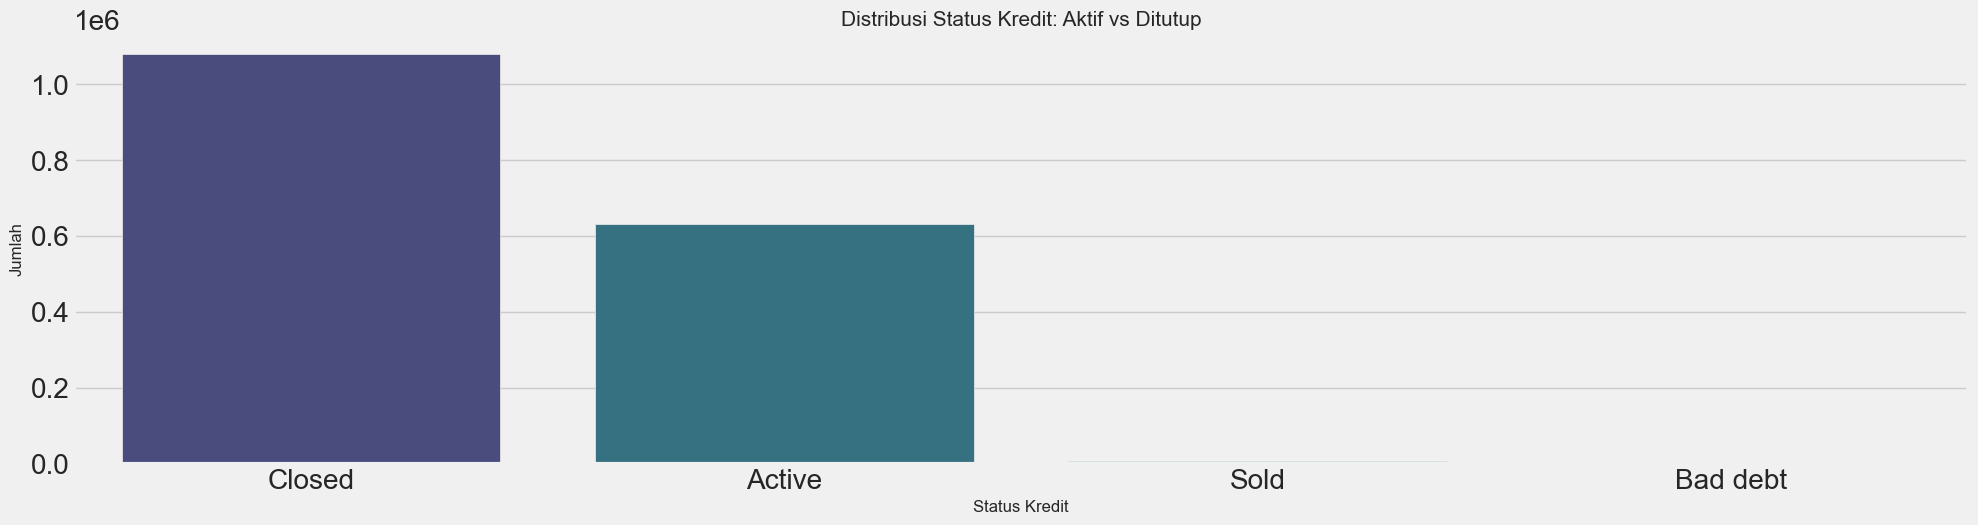

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat data
data = pd.read_csv('bureau.csv')

# Set ukuran untuk plot
plt.figure(figsize=(20, 15))

### 1. Grafik Status Kredit: Aktif vs Ditutup
plt.subplot(3, 1, 1)
sns.countplot(data=data, x='CREDIT_ACTIVE', palette='viridis')
plt.title('Distribusi Status Kredit: Aktif vs Ditutup', fontsize=15)
plt.xlabel('Status Kredit', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


**Kredit Aktif dan Ditutup:**<br> grafik ini membantu perusahaan dalam memahami jumlah kredit aktif yang masih berjalan versus yang sudah ditutup, serta memberikan indikasi tentang seberapa baik portofolio kredit perusahaan saat ini.<br>

**Analisis**: Terdapat dua status utama untuk kredit, yaitu "Active" dan "Closed." Banyak nasabah yang memiliki status "Closed," yang menunjukkan bahwa mereka telah menyelesaikan kewajiban pinjaman mereka.<br>
**Insight**: Perusahaan dapat memanfaatkan data nasabah yang memiliki status "Closed" untuk mengidentifikasi profil nasabah yang berhasil dalam pengelolaan utang. Program penghargaan atau tawaran khusus dapat dirancang untuk nasabah ini agar tetap setia.<br>

Text(0, 0.5, 'Jumlah Kredit')

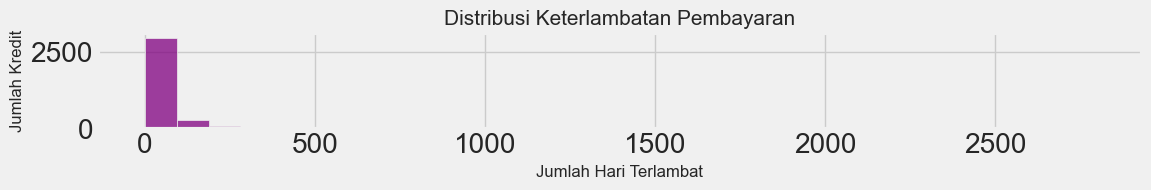

In [321]:
### 2. Grafik Keterlambatan Pembayaran (CREDIT_DAY_OVERDUE)
plt.subplot(3, 1, 2)
sns.histplot(data=data[data['CREDIT_DAY_OVERDUE'] > 0], x='CREDIT_DAY_OVERDUE', kde=False, bins=30, color='purple')
plt.title('Distribusi Keterlambatan Pembayaran', fontsize=15)
plt.xlabel('Jumlah Hari Terlambat', fontsize=12)
plt.ylabel('Jumlah Kredit', fontsize=12)

**Keterlambatan Pembayaran:**<br> Pada grafik ini memberikan wawasan terkait risiko nasabah yang menunggak pembayaran, yang bisa menjadi fokus untuk strategi mitigasi risiko.<br>
**Analisis**: CREDIT_DAY_OVERDUE menunjukkan bahwa sebagian besar nasabah tidak memiliki keterlambatan (0), tetapi ada beberapa yang menunjukkan nilai yang lebih tinggi.<br>
**Insight**: Perusahaan harus lebih proaktif dalam memonitor nasabah yang mengalami keterlambatan, dan mempertimbangkan pengembangan program edukasi mengenai pengelolaan keuangan untuk mencegah keterlambatan di masa depan.

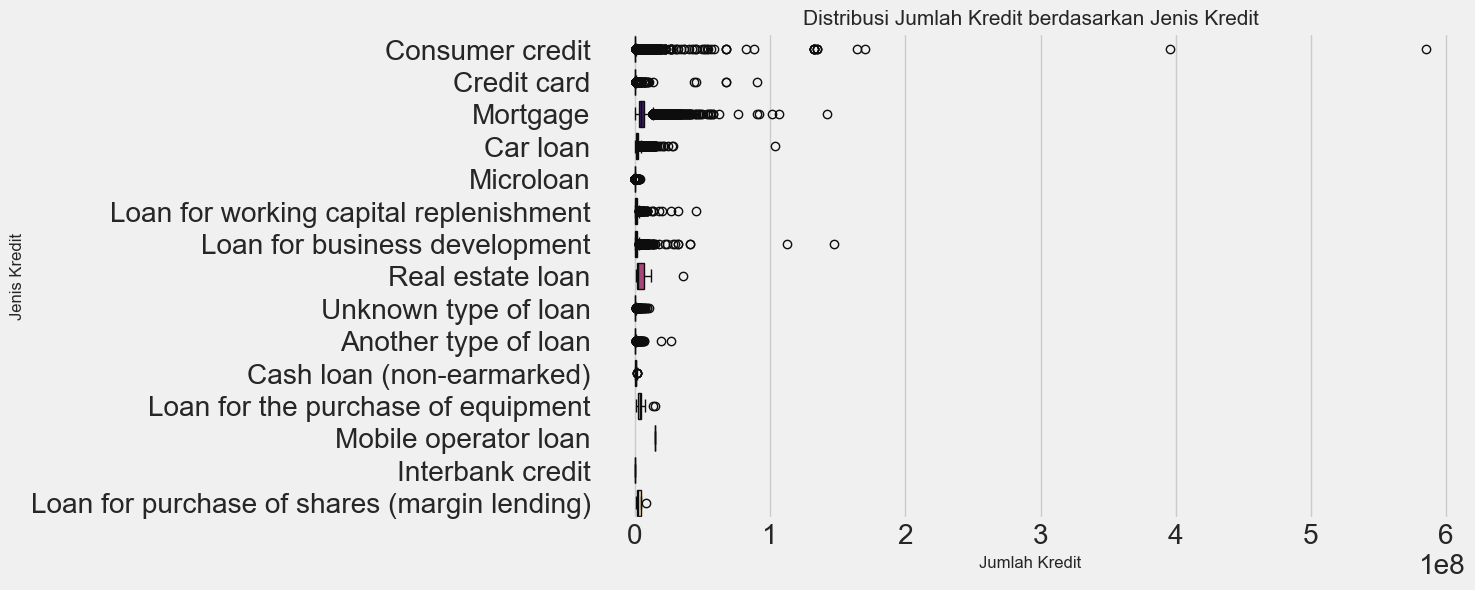

In [325]:

### 3. Grafik Distribusi Jenis Kredit dan Jumlah Kredit (AMT_CREDIT_SUM)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='CREDIT_TYPE', x='AMT_CREDIT_SUM', palette='magma')
plt.title('Distribusi Jumlah Kredit berdasarkan Jenis Kredit', fontsize=15)
plt.ylabel('Jenis Kredit', fontsize=12)
plt.xlabel('Jumlah Kredit', fontsize=12)
plt.show()


**Distribusi Kredit Berdasarkan Jenis:** <br> Grafik ini memberikan wawasan mengenai distribusi jumlah kredit berdasarkan jenis produk kredit, membantu perusahaan memahami jenis kredit mana yang paling berisiko atau paling menguntungkan.<br>
**Analisis**: CREDIT_TYPE mengindikasikan jenis kredit yang diambil nasabah. Dengan adanya variasi jenis kredit (misalnya, "Consumer credit" dan "Car loan"), perusahaan dapat memahami preferensi nasabah.<br>
**Insight**: Memperluas penawaran produk berdasarkan preferensi kredit nasabah dapat meningkatkan penjualan. Misalnya, nasabah dengan pinjaman mobil mungkin lebih tertarik pada produk asuransi mobil atau layanan lain yang terkait.